In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats

In [2]:
dr3=pd.read_feather(r'data\reductions_in_trips.feather')
dr3.head(2)

,ds,after_trips,travel_mode,before_trips
0,2022-12-01,31582,bike,32001
1,2022-12-01,33074,bus,32116


# 1 changes in trips

## 1 Bus

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.ticker import FuncFormatter

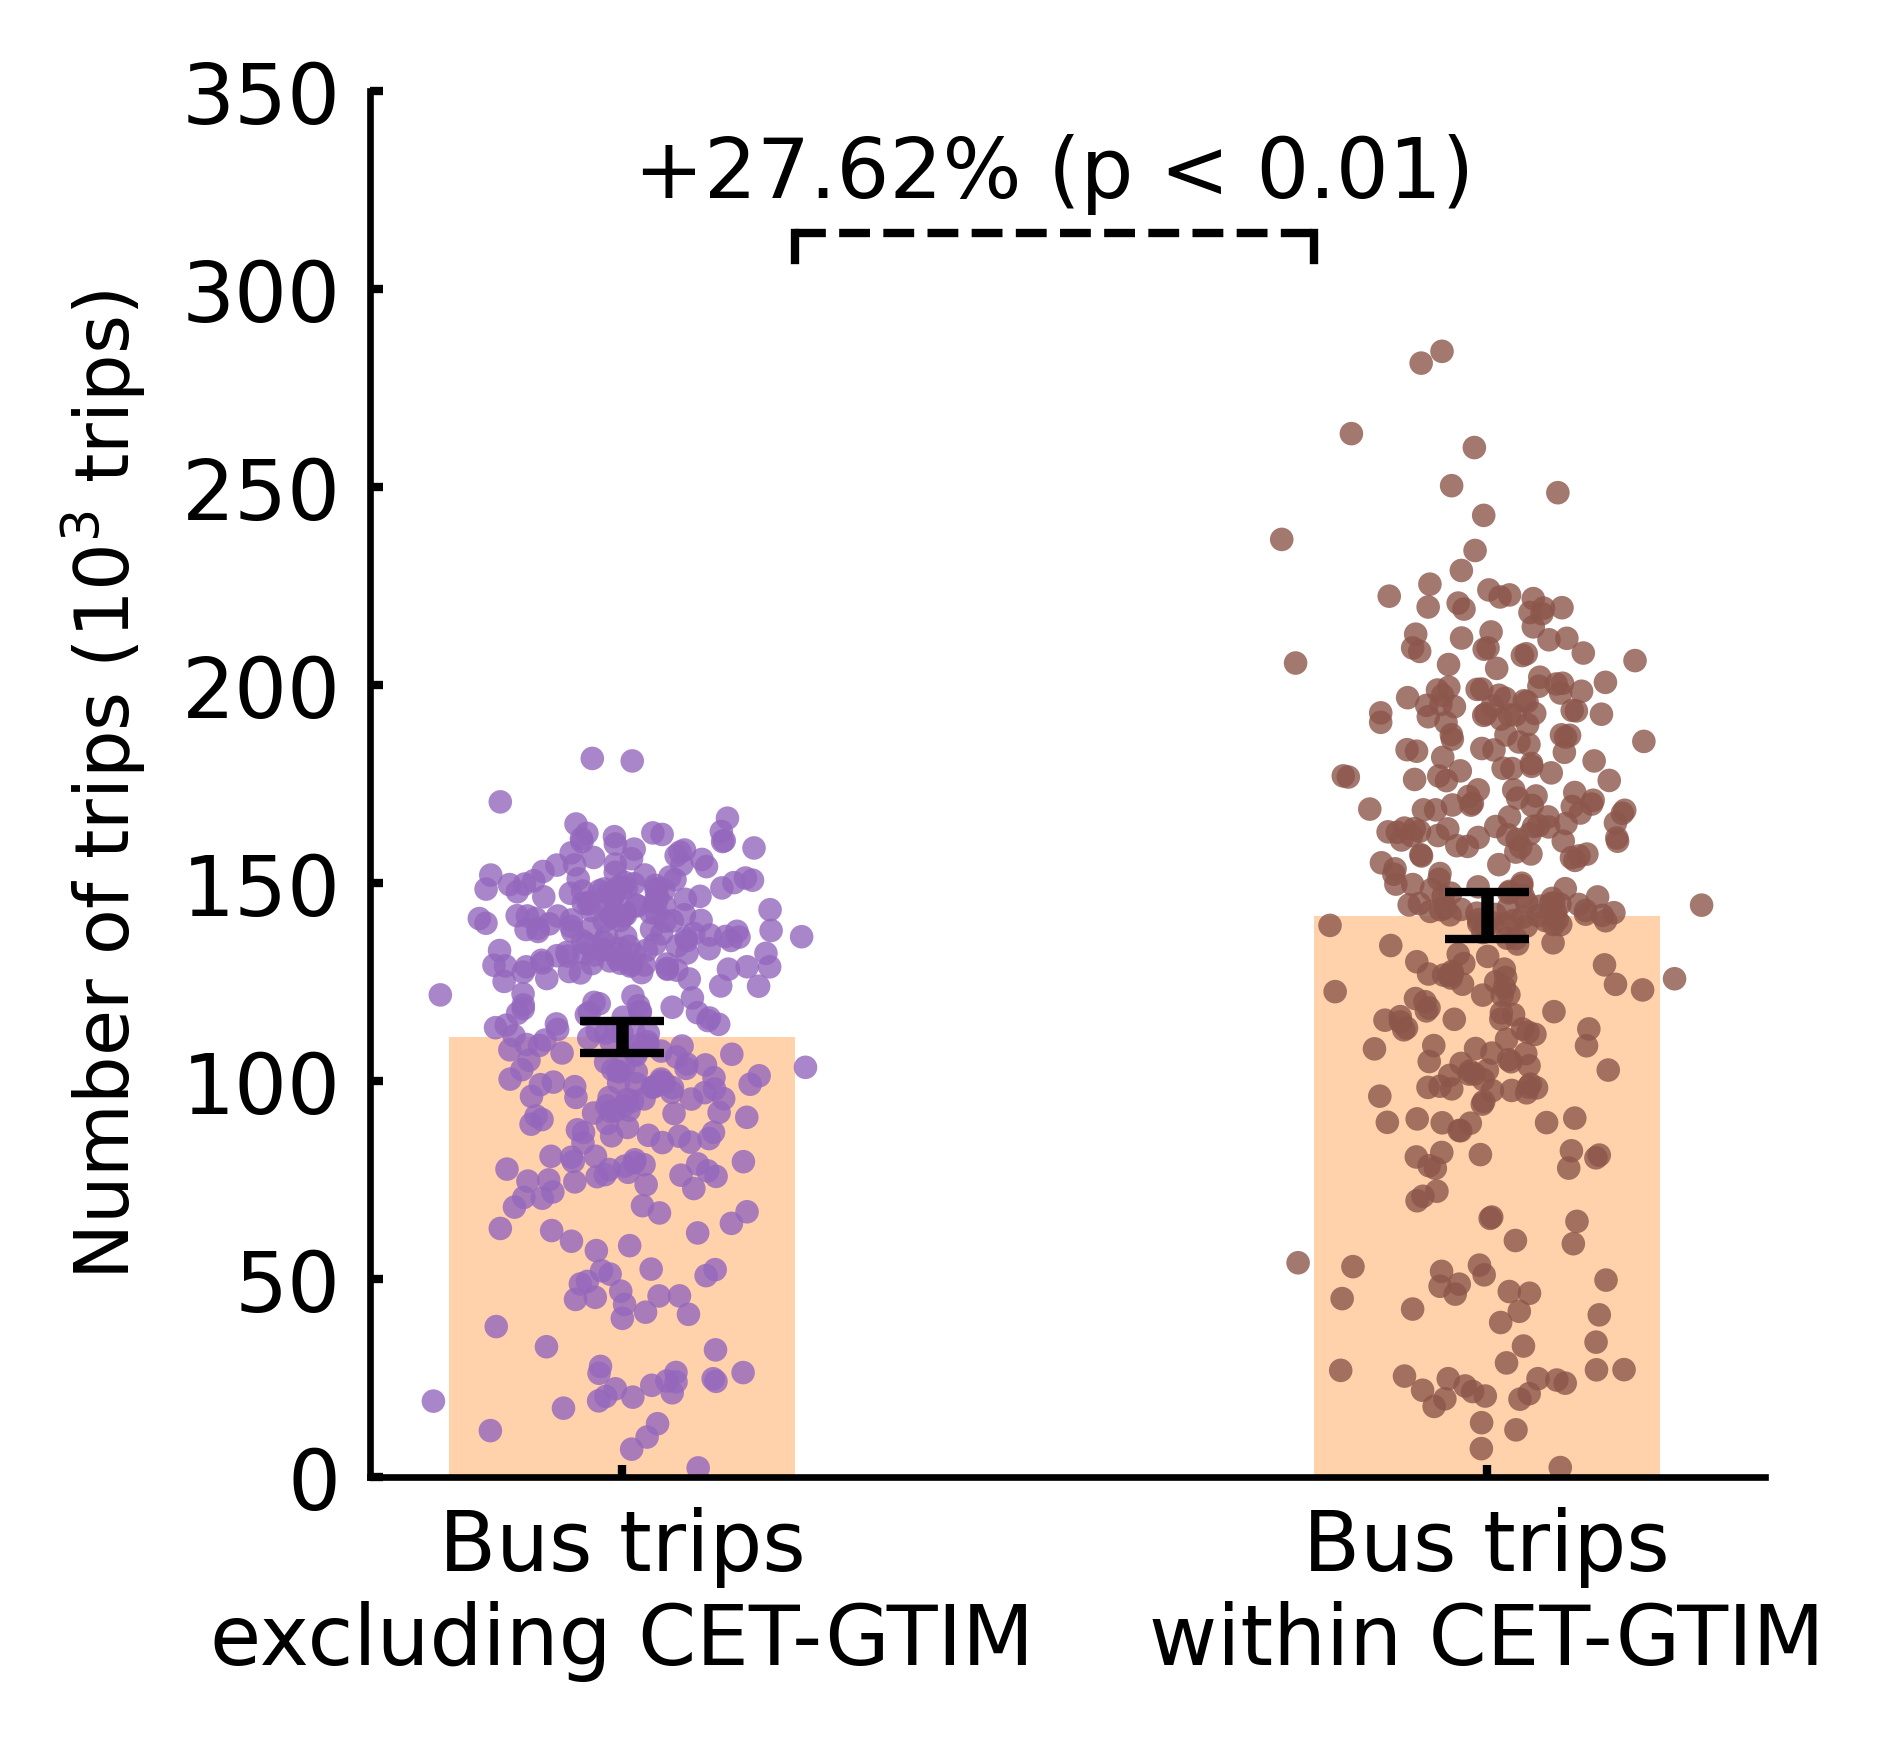

In [4]:


data_subset = [np.array(dr3[dr3['travel_mode']=='bus']['before_trips']), np.array(dr3[dr3['travel_mode']=='bus']['after_trips'])]

means_subset = [np.mean(group) / 1000 for group in data_subset]  
standard_errors_subset = [stats.sem(group) / 1000 for group in data_subset]  
confidence_interval_multiplier_subset = [stats.t.ppf((1 + 0.95) / 2., len(group) - 1) for group in data_subset]
confidence_intervals_subset = [se * ci_multiplier for se, ci_multiplier in zip(standard_errors_subset, confidence_interval_multiplier_subset)]


t_stat, p_value = stats.ttest_rel(data_subset[0], data_subset[1])


if p_value < 0.01:
    sig_label = "p < 0.01"
elif p_value < 0.02:
    sig_label = "p < 0.02"
elif p_value <= 0.05:
    sig_label = "p < 0.05"
else:
    sig_label = "p > 0.5"

def thousands_separator(x, pos):
    return f'{x:.0f}' 

plt.figure(figsize=(3, 3), dpi=600)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] =1
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


bar_positions_adjusted = [0.1, 0.6]
bar_width = 0.2
plt.bar(bar_positions_adjusted, means_subset, width=bar_width, color=plt.cm.tab10(1), yerr=confidence_intervals_subset, capsize=5, label='Average values with 95% CI',alpha=0.35)

for i, group in enumerate(data_subset):
    x = np.random.normal(bar_positions_adjusted[i], 0.04, size=len(group[group < max(group)]))
    plt.scatter(x, group[group < max(group)] / 1000, alpha=0.8, s=8, edgecolors='none',color=plt.cm.tab10(4+i)) 

max_value_for_line = max(max(data_subset[0][data_subset[0] < max(data_subset[0])]), max(data_subset[1][data_subset[1] < max(data_subset[1])])) / 1000 + 30  

plt.plot([bar_positions_adjusted[0]+bar_width/2, bar_positions_adjusted[1]-bar_width/2], [max_value_for_line, max_value_for_line], color='black', linestyle='--', linewidth=1)
plt.plot([bar_positions_adjusted[0]+bar_width/2, bar_positions_adjusted[0]+bar_width/2], [max_value_for_line - 7, max_value_for_line], color='black', linestyle='-', linewidth=1)
plt.plot([bar_positions_adjusted[1]-bar_width/2, bar_positions_adjusted[1]-bar_width/2], [max_value_for_line - 7, max_value_for_line], color='black', linestyle='-', linewidth=1)

percentage_change = ((means_subset[1] - means_subset[0]) / means_subset[0]) * 100
change_symbol = "+" if percentage_change > 0 else "-"
plt.text(np.mean(bar_positions_adjusted), max_value_for_line + 9, f"{change_symbol}{abs(percentage_change):.2f}% ({sig_label})", ha='center')

formatter = FuncFormatter(thousands_separator)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(bar_positions_adjusted, ['Bus trips\nexcluding CET-GTIM', 'Bus trips\nwithin CET-GTIM'], fontsize=9)
plt.ylabel('Number of trips ($10^3$ trips)', fontsize=9)
plt.ylim(0, 350) 
ax.tick_params(axis='both', which='major', length=1.5, width=1, 
               color='black', labelsize=10, direction='in')

plt.rcParams['svg.fonttype'] = 'none'

plt.show()


## 2 subway

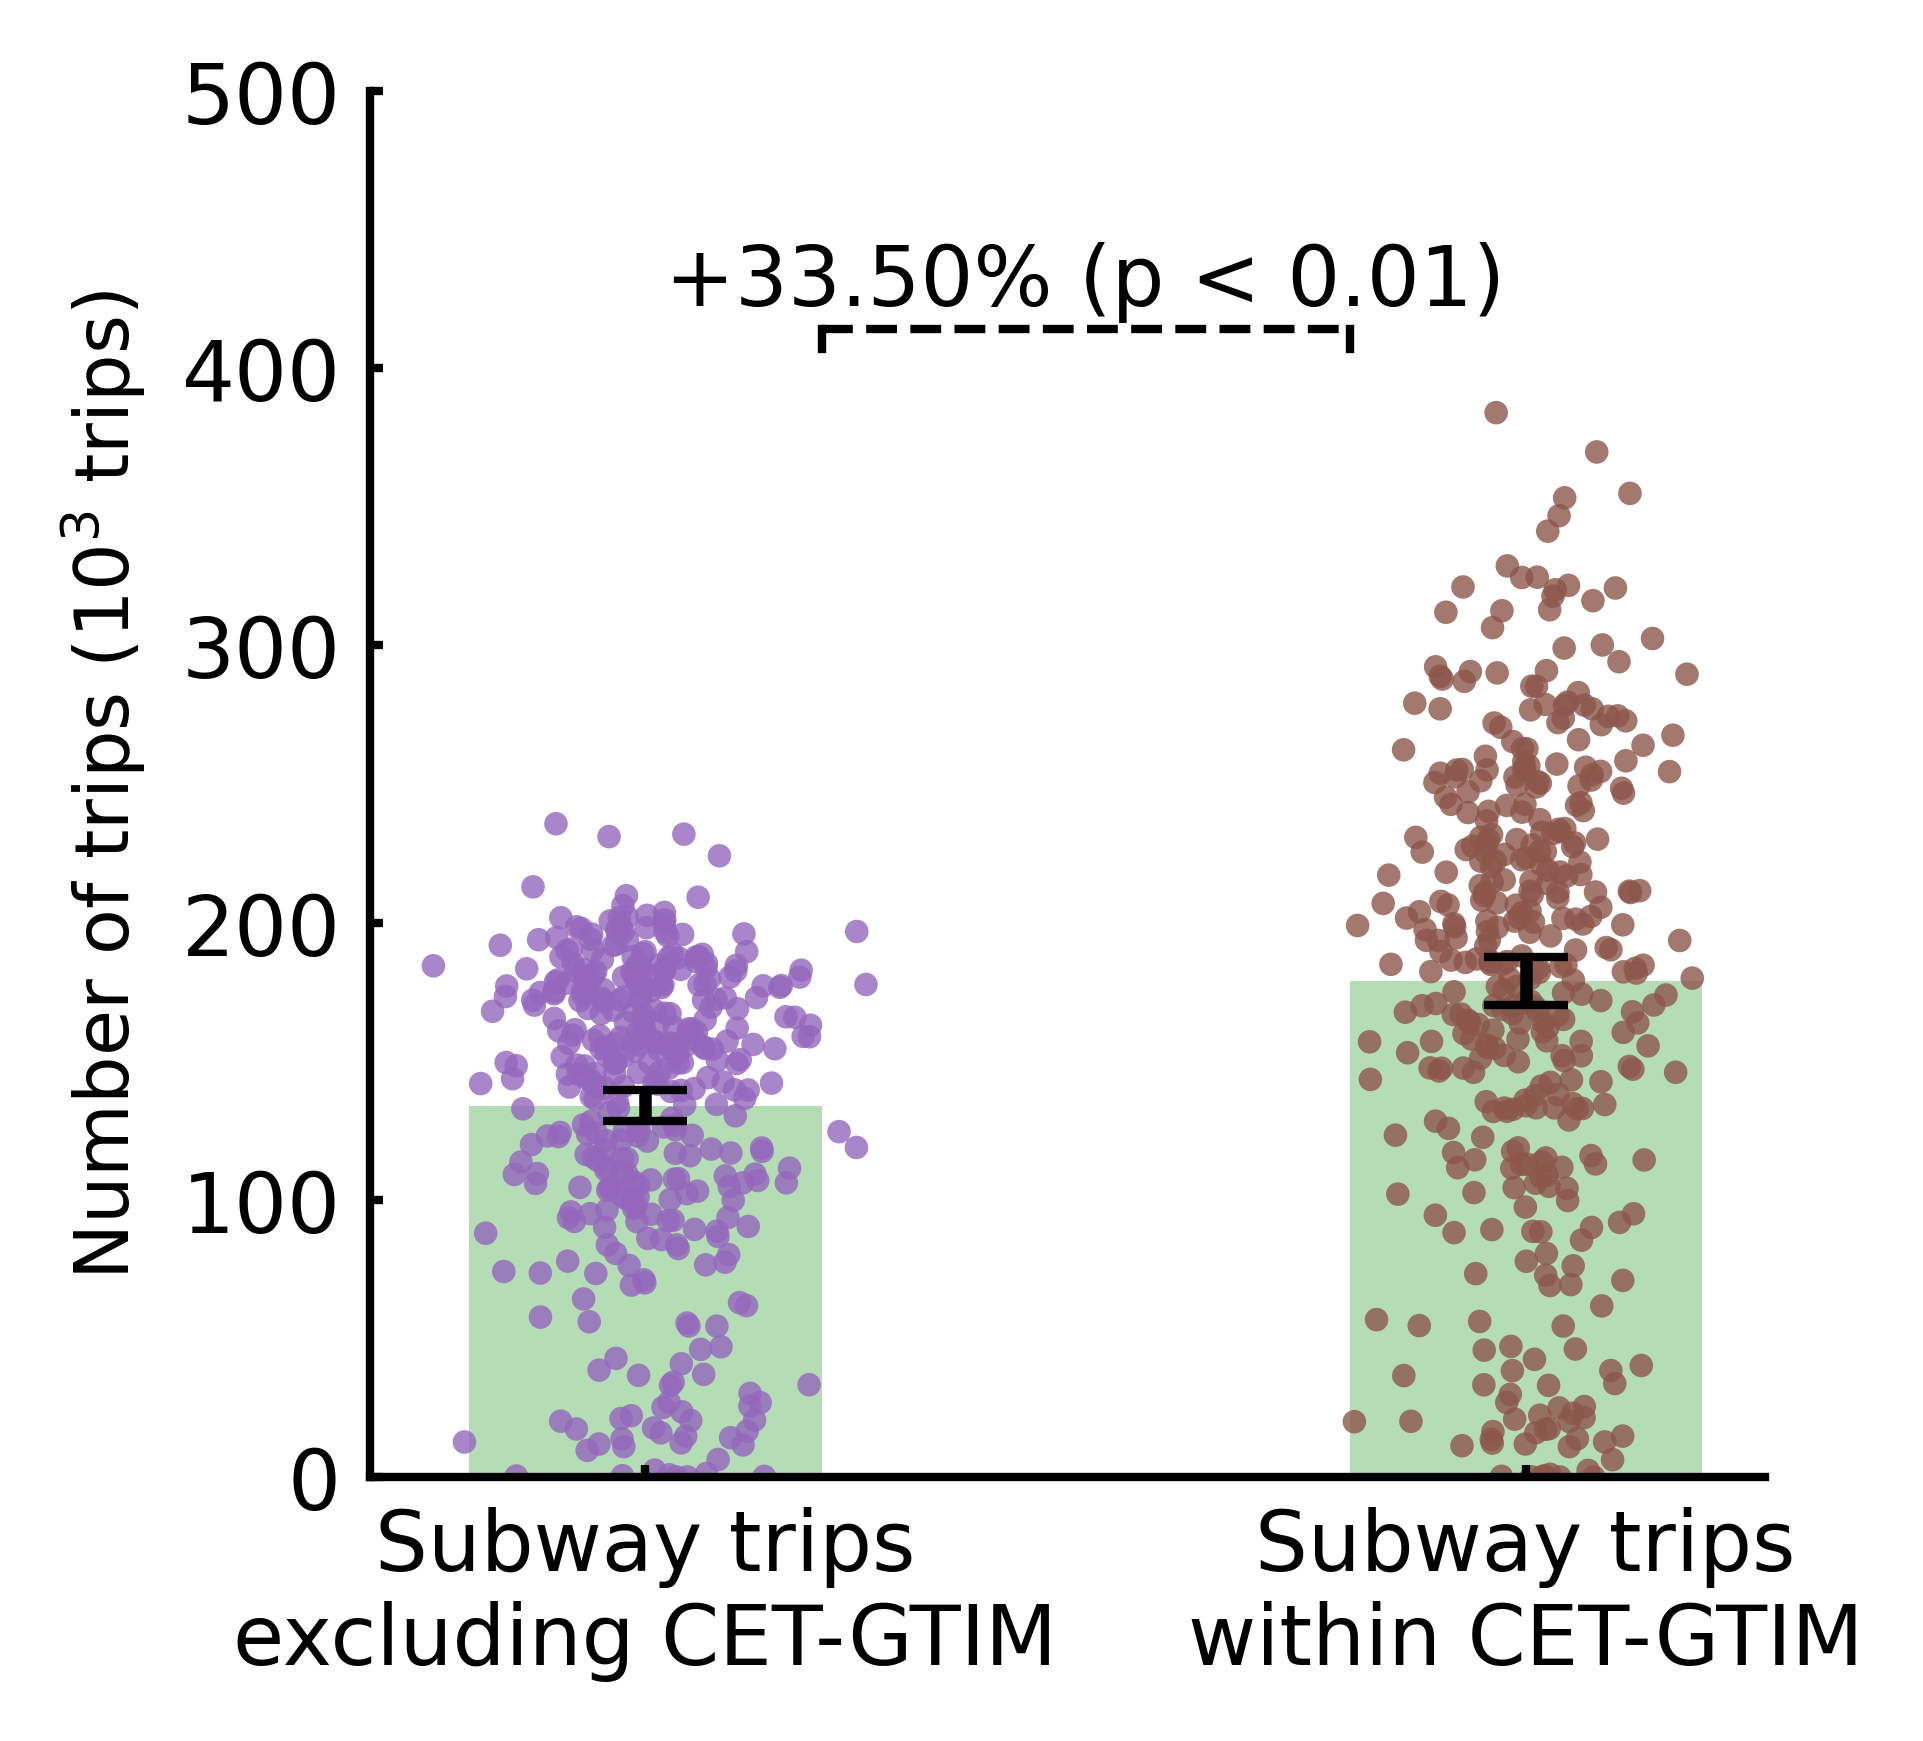

In [5]:

data_subset = [np.array(dr3[dr3['travel_mode']=='subway']['before_trips']), np.array(dr3[dr3['travel_mode']=='subway']['after_trips'])]

means_subset = [np.mean(group) / 1000 for group in data_subset]  #
standard_errors_subset = [stats.sem(group) / 1000 for group in data_subset]  # 
confidence_interval_multiplier_subset = [stats.t.ppf((1 + 0.95) / 2., len(group) - 1) for group in data_subset]
confidence_intervals_subset = [se * ci_multiplier for se, ci_multiplier in zip(standard_errors_subset, confidence_interval_multiplier_subset)]

t_stat, p_value = stats.ttest_rel(data_subset[0], data_subset[1])


if p_value < 0.01:
    sig_label = "p < 0.01"
elif p_value < 0.02:
    sig_label = "p < 0.02"
elif p_value <= 0.05:
    sig_label = "p < 0.05"
else:
    sig_label = "p > 0.5"

def thousands_separator(x, pos):
    return f'{x:.0f}' 

plt.figure(figsize=(3, 3), dpi=600)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] =1
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


bar_positions_adjusted = [0.1, 0.6]
bar_width = 0.2
plt.bar(bar_positions_adjusted, means_subset, width=bar_width, color=plt.cm.tab10(2), yerr=confidence_intervals_subset, capsize=5, label='Average values with 95% CI',alpha=0.35)

for i, group in enumerate(data_subset):
    x = np.random.normal(bar_positions_adjusted[i], 0.04, size=len(group[group < max(group)]))
    plt.scatter(x, group[group < max(group)] / 1000, alpha=0.8, s=8, edgecolors='none',color=plt.cm.tab10(4+i))  # 

max_value_for_line = max(max(data_subset[0][data_subset[0] < max(data_subset[0])]), max(data_subset[1][data_subset[1] < max(data_subset[1])])) / 1000 + 30  #

plt.plot([bar_positions_adjusted[0]+bar_width/2, bar_positions_adjusted[1]-bar_width/2], [max_value_for_line, max_value_for_line], color='black', linestyle='--', linewidth=1)
plt.plot([bar_positions_adjusted[0]+bar_width/2, bar_positions_adjusted[0]+bar_width/2], [max_value_for_line - 7, max_value_for_line], color='black', linestyle='-', linewidth=1)
plt.plot([bar_positions_adjusted[1]-bar_width/2, bar_positions_adjusted[1]-bar_width/2], [max_value_for_line - 7, max_value_for_line], color='black', linestyle='-', linewidth=1)

percentage_change = ((means_subset[1] - means_subset[0]) / means_subset[0]) * 100
change_symbol = "+" if percentage_change > 0 else "-"
plt.text(np.mean(bar_positions_adjusted), max_value_for_line + 9, f"{change_symbol}{abs(percentage_change):.2f}% ({sig_label})", ha='center')

formatter = FuncFormatter(thousands_separator)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(bar_positions_adjusted, ['Subway trips\nexcluding CET-GTIM','Subway trips\nwithin CET-GTIM'],fontsize=9)
plt.ylabel('Number of trips ($10^3$ trips)', fontsize=9)
plt.ylim(0, 500) 

ax.tick_params(axis='both', which='major', length=1.5, width=1, 
               color='black', labelsize=10, direction='in')


plt.rcParams['svg.fonttype'] = 'none'

plt.show()


## 3 bike

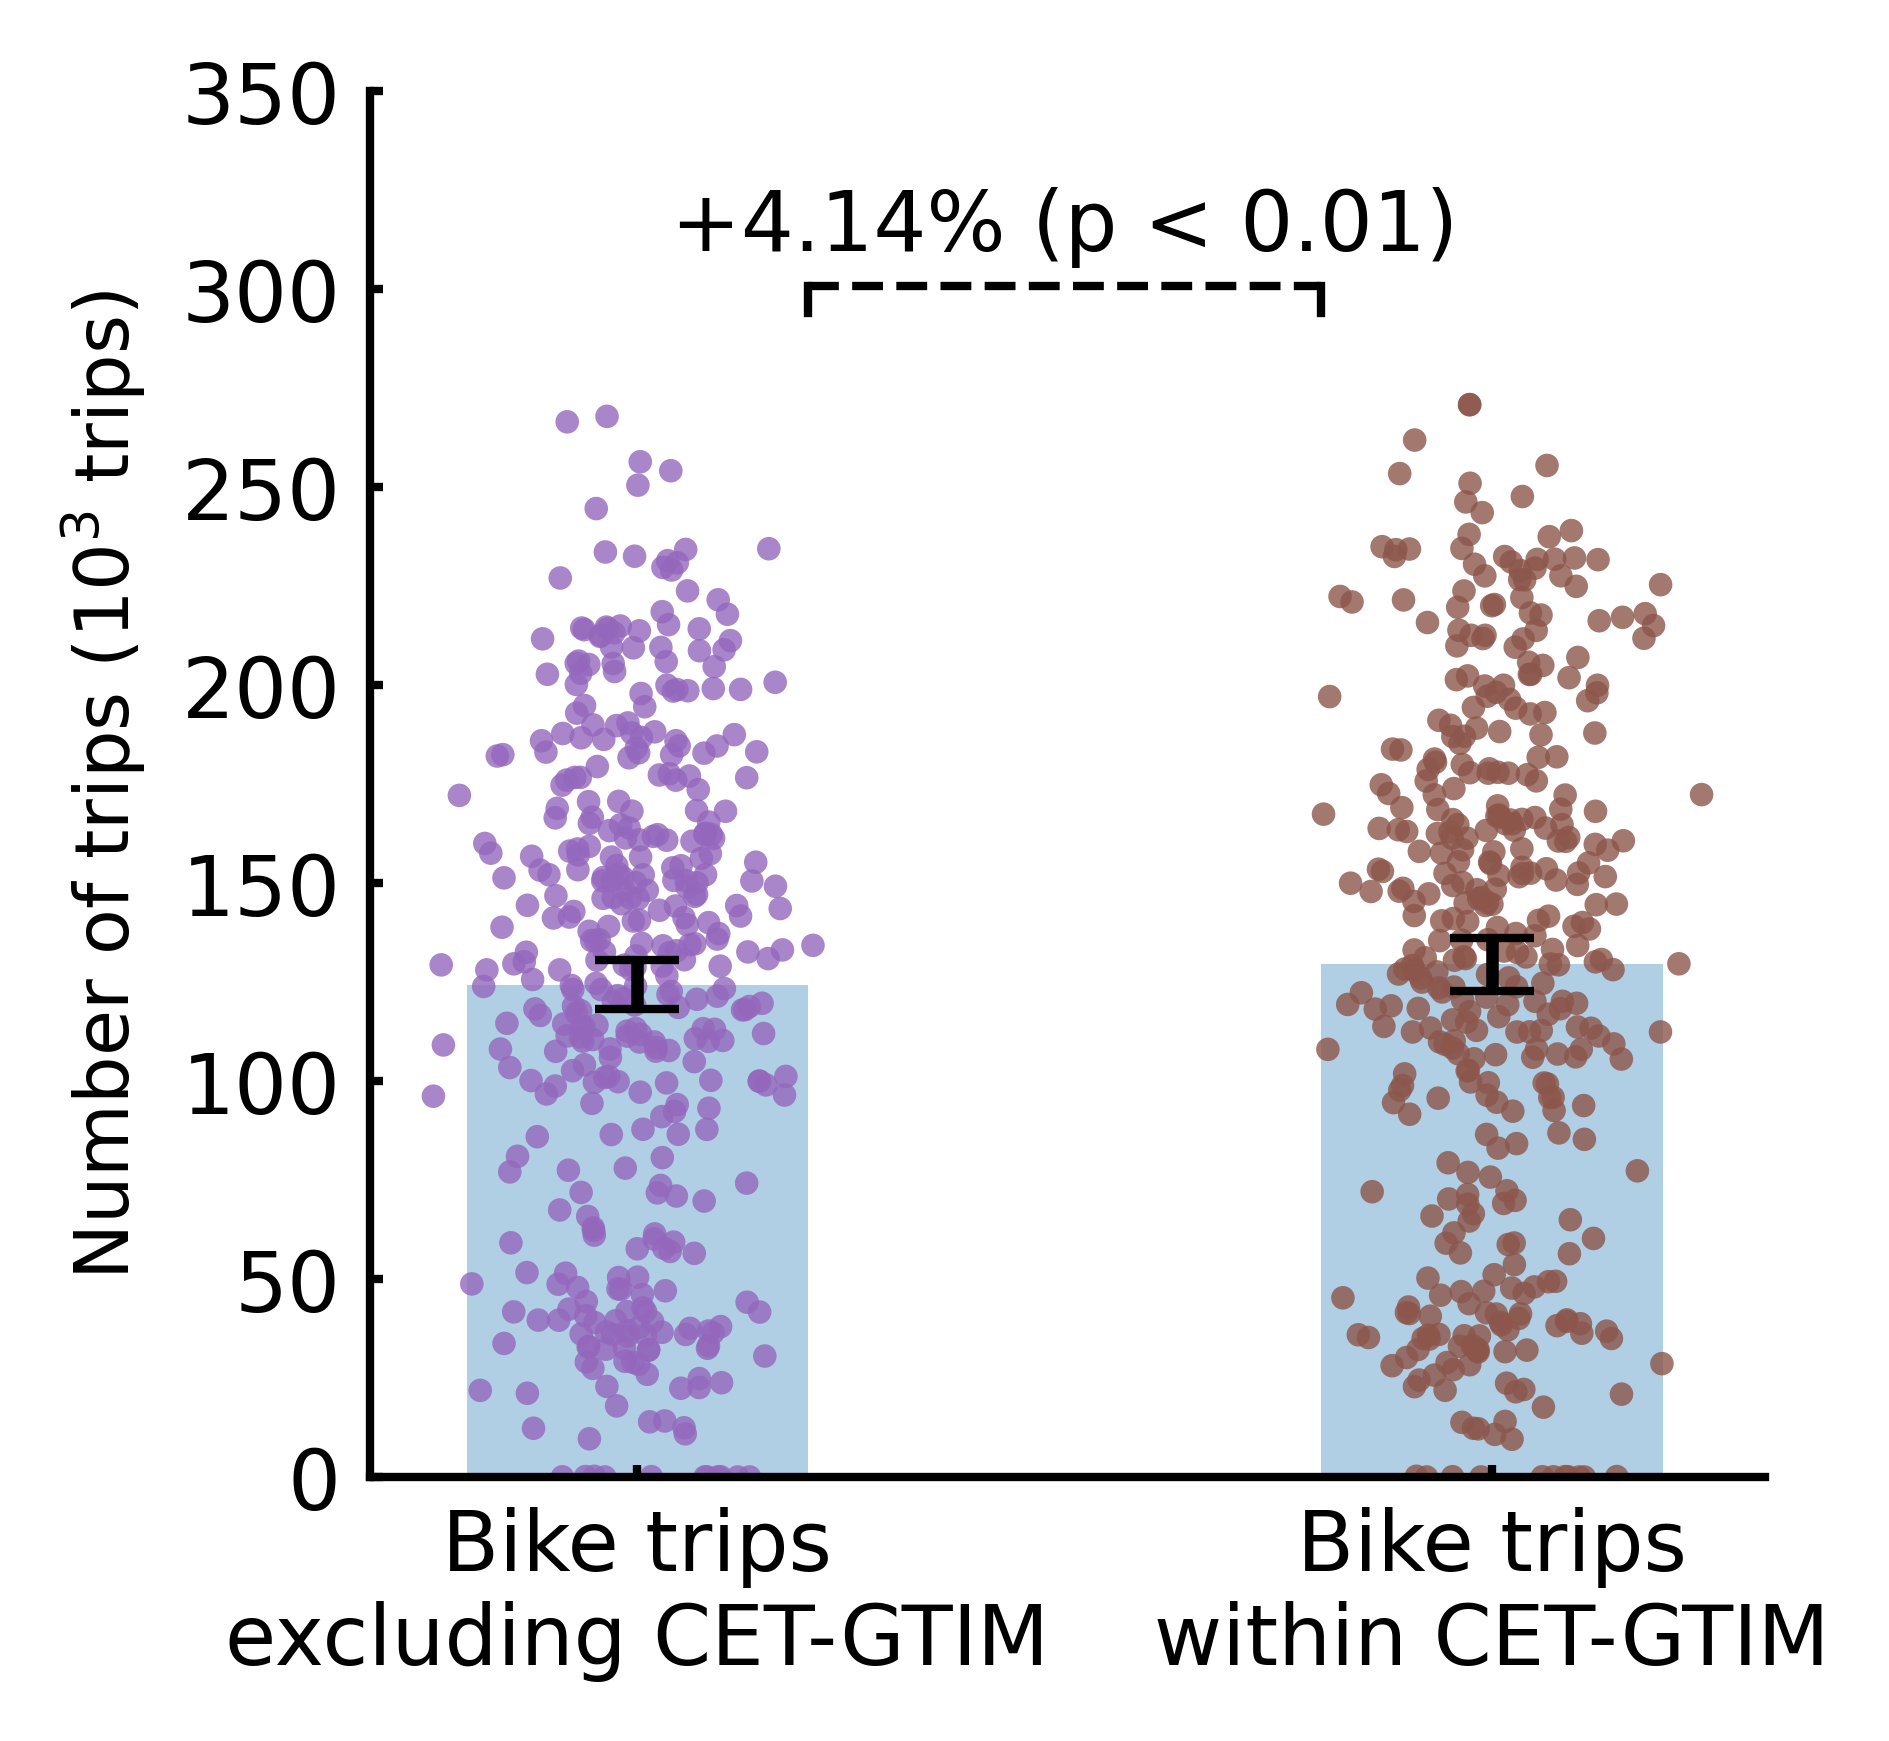

In [6]:


data_subset = [np.array(dr3[dr3['travel_mode']=='bike']['before_trips']), np.array(dr3[dr3['travel_mode']=='bike']['after_trips'])]

means_subset = [np.mean(group) / 1000 for group in data_subset] 
standard_errors_subset = [stats.sem(group) / 1000 for group in data_subset] 
confidence_interval_multiplier_subset = [stats.t.ppf((1 + 0.95) / 2., len(group) - 1) for group in data_subset]
confidence_intervals_subset = [se * ci_multiplier for se, ci_multiplier in zip(standard_errors_subset, confidence_interval_multiplier_subset)]

t_stat, p_value = stats.ttest_rel(data_subset[0], data_subset[1])

if p_value < 0.01:
    sig_label = "p < 0.01"
elif p_value < 0.02:
    sig_label = "p < 0.02"
elif p_value <= 0.05:
    sig_label = "p < 0.05"
else:
    sig_label = "p > 0.5"

def thousands_separator(x, pos):
    return f'{x:.0f}' 

plt.figure(figsize=(3, 3), dpi=600)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] =1
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


bar_positions_adjusted = [0.1, 0.6]
bar_width = 0.2
plt.bar(bar_positions_adjusted, means_subset, width=bar_width, color=plt.cm.tab10(0), yerr=confidence_intervals_subset, capsize=5, label='Average values with 95% CI',alpha=0.35)

for i, group in enumerate(data_subset):
    x = np.random.normal(bar_positions_adjusted[i], 0.04, size=len(group[group < max(group)]))
    plt.scatter(x, group[group < max(group)] / 1000, alpha=0.8, s=8, edgecolors='none',color=plt.cm.tab10(4+i))  

max_value_for_line = max(max(data_subset[0][data_subset[0] < max(data_subset[0])]), max(data_subset[1][data_subset[1] < max(data_subset[1])])) / 1000 + 30 

plt.plot([bar_positions_adjusted[0]+bar_width/2, bar_positions_adjusted[1]-bar_width/2], [max_value_for_line, max_value_for_line], color='black', linestyle='--', linewidth=1)
plt.plot([bar_positions_adjusted[0]+bar_width/2, bar_positions_adjusted[0]+bar_width/2], [max_value_for_line - 7, max_value_for_line], color='black', linestyle='-', linewidth=1)
plt.plot([bar_positions_adjusted[1]-bar_width/2, bar_positions_adjusted[1]-bar_width/2], [max_value_for_line - 7, max_value_for_line], color='black', linestyle='-', linewidth=1)

percentage_change = ((means_subset[1] - means_subset[0]) / means_subset[0]) * 100
change_symbol = "+" if percentage_change > 0 else "-"
plt.text(np.mean(bar_positions_adjusted), max_value_for_line + 9, f"{change_symbol}{abs(percentage_change):.2f}% ({sig_label})", ha='center')

formatter = FuncFormatter(thousands_separator)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(bar_positions_adjusted, ['Bike trips\nexcluding CET-GTIM','Bike trips\nwithin CET-GTIM'],fontsize=9)
plt.ylabel('Number of trips ($10^3$ trips)', fontsize=9)
plt.ylim(0, 350) 

ax.tick_params(axis='both', which='major', length=1.5, width=1, 
               color='black', labelsize=10, direction='in')




## 4 Gasiline car

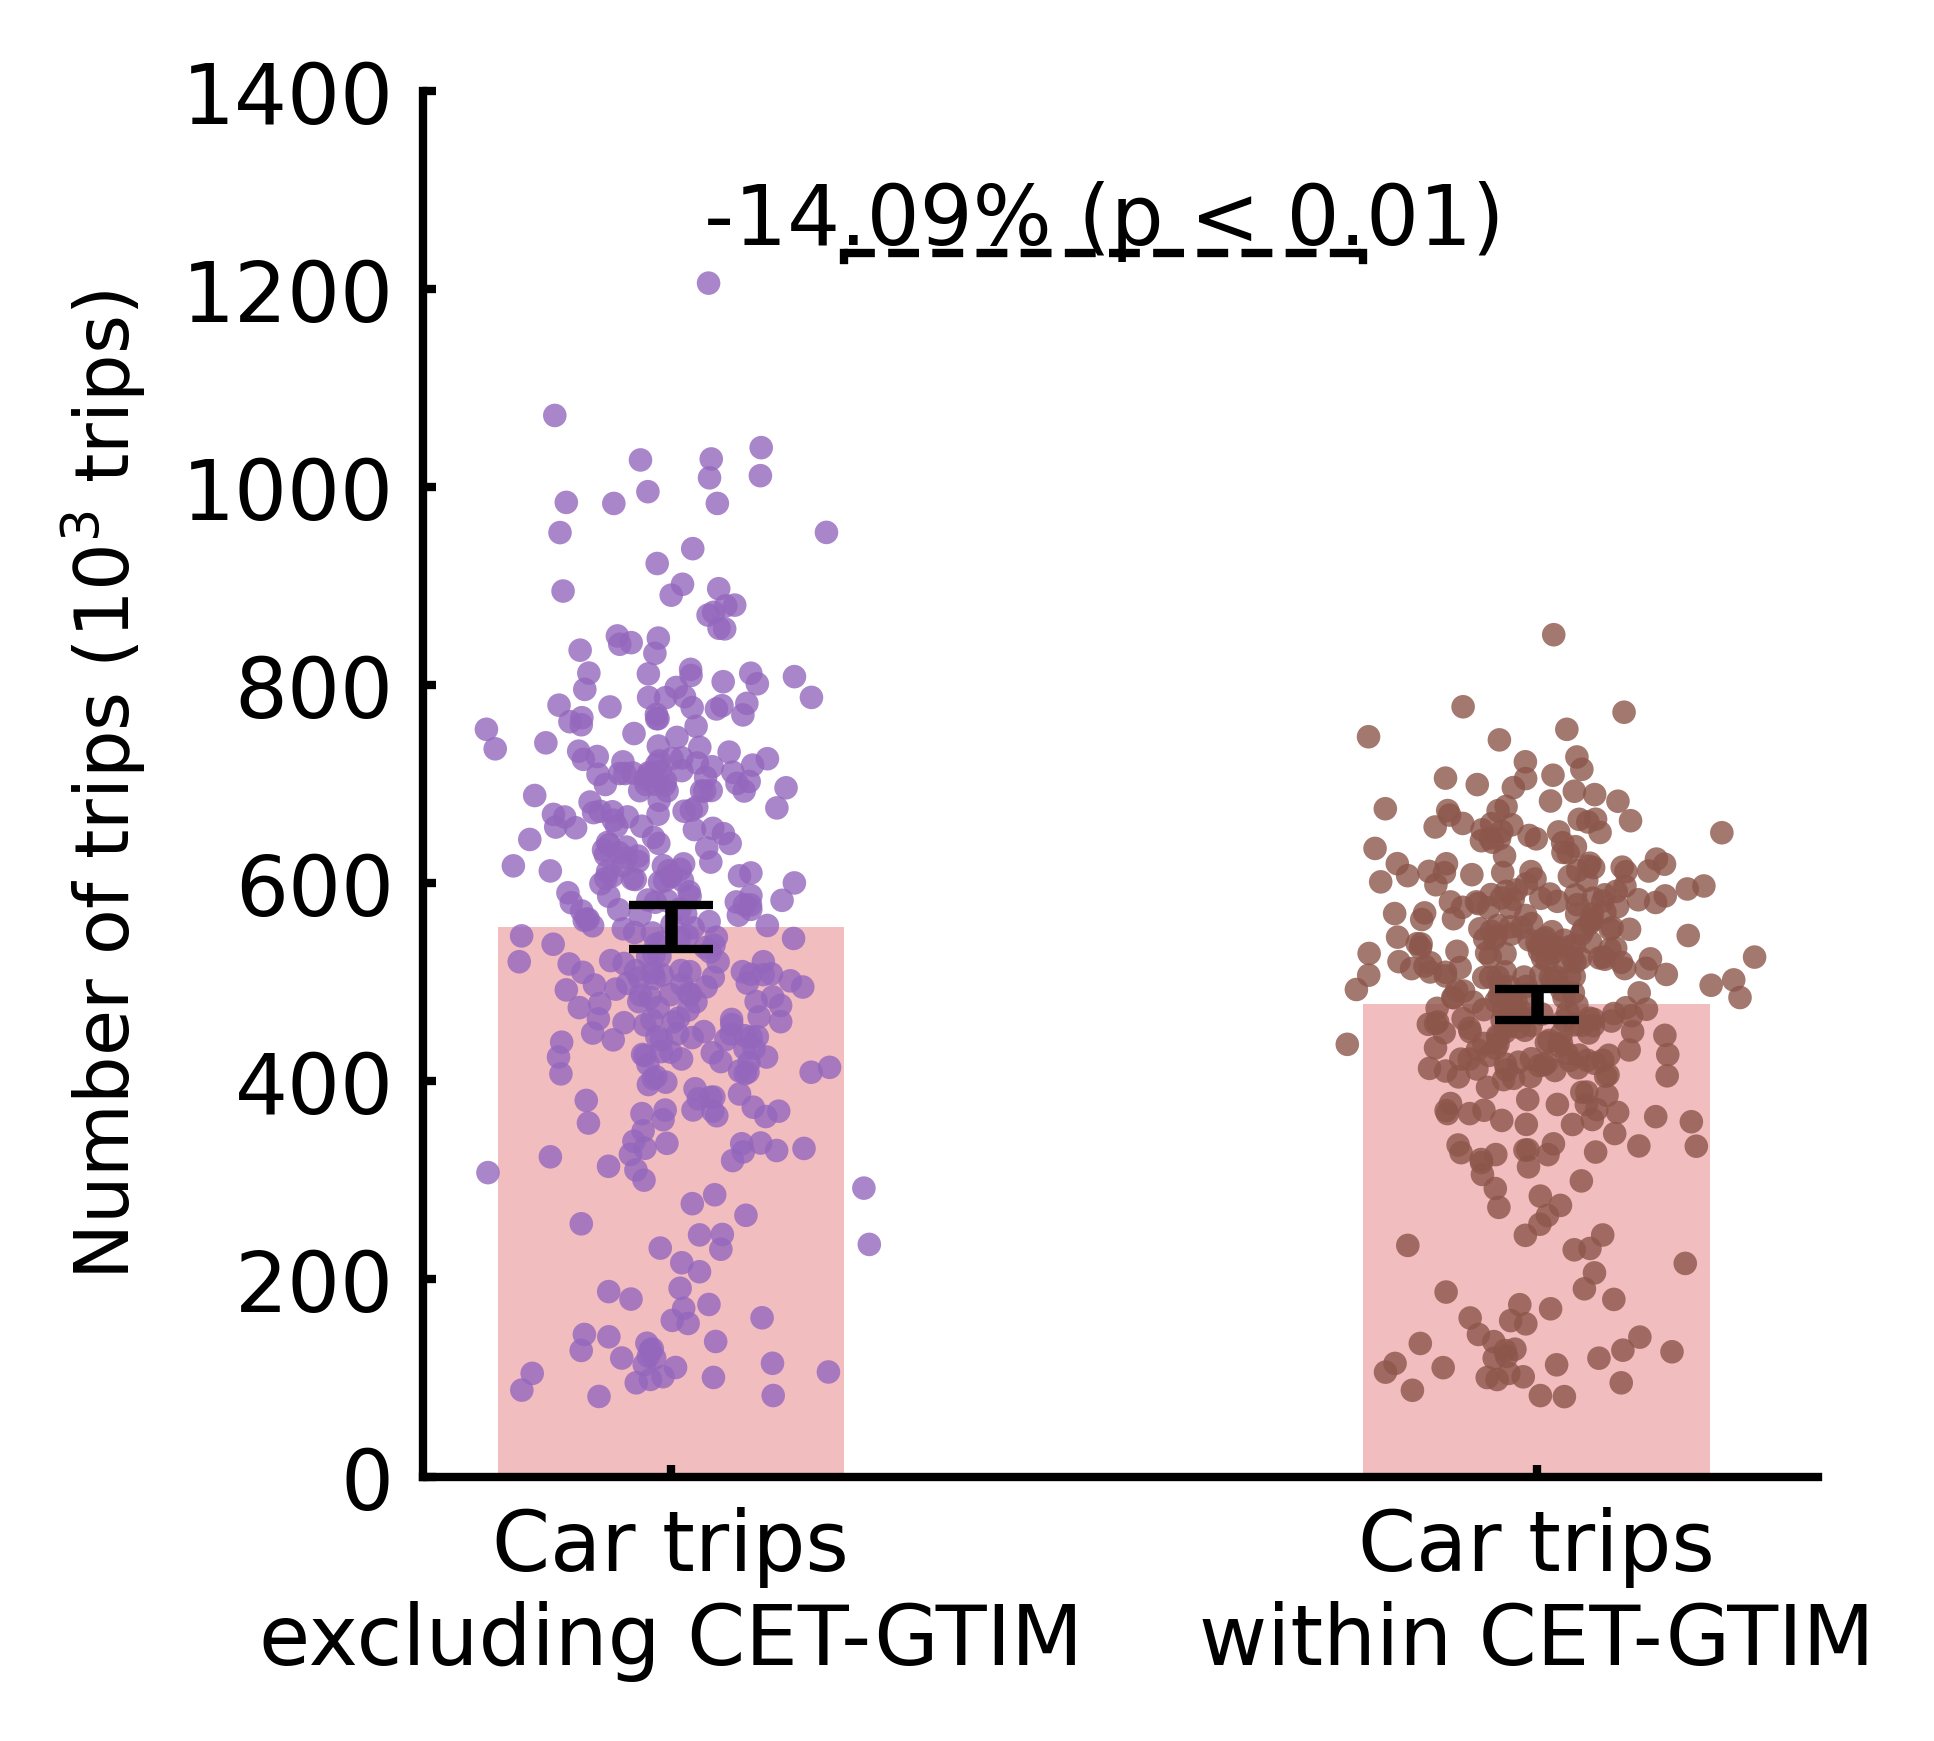

In [7]:


data_subset = [np.array(dr3[dr3['travel_mode']=='fuelcar']['before_trips']), np.array(dr3[dr3['travel_mode']=='fuelcar']['after_trips'])]

means_subset = [np.mean(group) / 1000 for group in data_subset]  
standard_errors_subset = [stats.sem(group) / 1000 for group in data_subset]  
confidence_interval_multiplier_subset = [stats.t.ppf((1 + 0.95) / 2., len(group) - 1) for group in data_subset]
confidence_intervals_subset = [se * ci_multiplier for se, ci_multiplier in zip(standard_errors_subset, confidence_interval_multiplier_subset)]

t_stat, p_value = stats.ttest_rel(data_subset[0], data_subset[1])

if p_value < 0.01:
    sig_label = "p < 0.01"
elif p_value < 0.02:
    sig_label = "p < 0.02"
elif p_value <= 0.05:
    sig_label = "p < 0.05"
else:
    sig_label = "p > 0.5"

def thousands_separator(x, pos):
    return f'{x:.0f}'

plt.figure(figsize=(3, 3), dpi=600)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] =1
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


bar_positions_adjusted = [0.1, 0.6]
bar_width = 0.2
plt.bar(bar_positions_adjusted, means_subset, width=bar_width, color=plt.cm.tab10(3), yerr=confidence_intervals_subset, capsize=5, label='Average values with 95% CI',alpha=0.3)

for i, group in enumerate(data_subset):
    x = np.random.normal(bar_positions_adjusted[i], 0.04, size=len(group[group < max(group)]))
    plt.scatter(x, group[group < max(group)] / 1000, alpha=0.8, s=8, edgecolors='none',color=plt.cm.tab10(4+i)) 

max_value_for_line = max(max(data_subset[0][data_subset[0] < max(data_subset[0])]), max(data_subset[1][data_subset[1] < max(data_subset[1])])) / 1000 + 30 

plt.plot([bar_positions_adjusted[0]+bar_width/2, bar_positions_adjusted[1]-bar_width/2], [max_value_for_line, max_value_for_line], color='black', linestyle='--', linewidth=1)
plt.plot([bar_positions_adjusted[0]+bar_width/2, bar_positions_adjusted[0]+bar_width/2], [max_value_for_line - 7, max_value_for_line], color='black', linestyle='-', linewidth=1)
plt.plot([bar_positions_adjusted[1]-bar_width/2, bar_positions_adjusted[1]-bar_width/2], [max_value_for_line - 7, max_value_for_line], color='black', linestyle='-', linewidth=1)

percentage_change = ((means_subset[1] - means_subset[0]) / means_subset[0]) * 100
change_symbol = "+" if percentage_change > 0 else "-"
plt.text(np.mean(bar_positions_adjusted), max_value_for_line + 9, f"{change_symbol}{abs(percentage_change):.2f}% ({sig_label})", ha='center')

formatter = FuncFormatter(thousands_separator)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(bar_positions_adjusted, ['Car trips\nexcluding CET-GTIM','Car trips\nwithin CET-GTIM'],fontsize=9)

plt.ylabel('Number of trips ($10^3$ trips)', fontsize=9)
plt.ylim(0, 1400) 

ax.tick_params(axis='both', which='major', length=1.5, width=1, 
               color='black', labelsize=10, direction='in')



# 2 mode shift ratio

In [8]:
dc2=pd.read_feather(r'data\mode_shit_ratio.feather')
dc2.head(2)

,travel_preference,after_mode,mode_shift
0,bike,bike,0.976804
1,bike,bus,0.015353


In [9]:
dc2[dc2['travel_preference']=='bus'][['after_mode','mode_shift']]

,after_mode,mode_shift
4,bike,0.026104
5,bus,0.952906
6,car,0.004652
7,subway,0.016338


In [10]:
lbs=['Bike','Bus','Subway','Gasoline car']


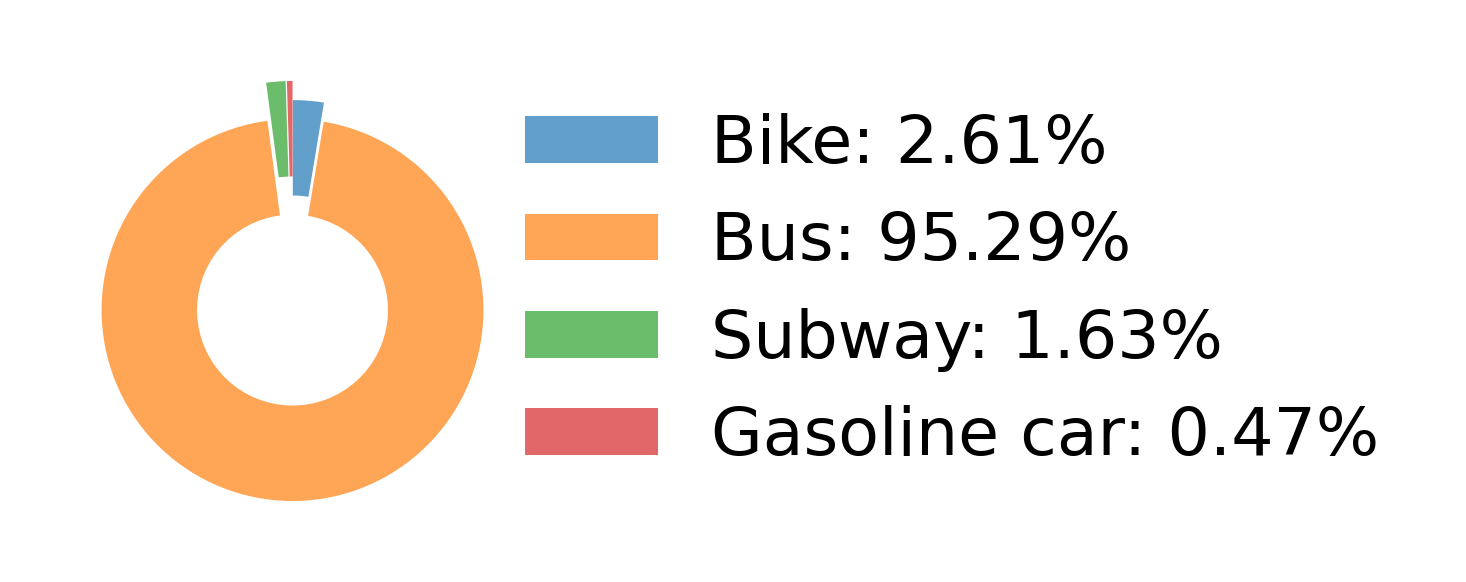

In [11]:


# Data from the image
labels = ['Bike','Bus','Subway','Gasoline car']
mode_shift = np.round(np.array([0.0261,0.9529,0.016338, 0.004652]),4)*100

explode = [0, 0.1, 0.1, 0.1]  
fig, ax = plt.subplots(figsize=(1,1),dpi=600)

wedges, texts = ax.pie(mode_shift, explode=explode, startangle=90, counterclock=False, 
                       wedgeprops=dict(width=0.5,alpha=0.7), colors=plt.cm.tab10.colors)

legend_labels = [f'{label}: {value:.2f}%' for label, value in zip(labels, mode_shift)]
legend = ax.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(0.87, 0, 0.5, 1),fontsize=8)

legend.get_frame().set_linewidth(0.0)
legend.get_frame().set_alpha(0.0)

ax.axis('equal')

#
plt.rcParams['svg.fonttype']='none'

plt.show()


In [12]:
dc2[dc2['travel_preference']=='subway'][['after_mode','mode_shift']]

,after_mode,mode_shift
12,bike,0.004260
13,bus,0.043701
14,car,0.000467
15,subway,0.951572


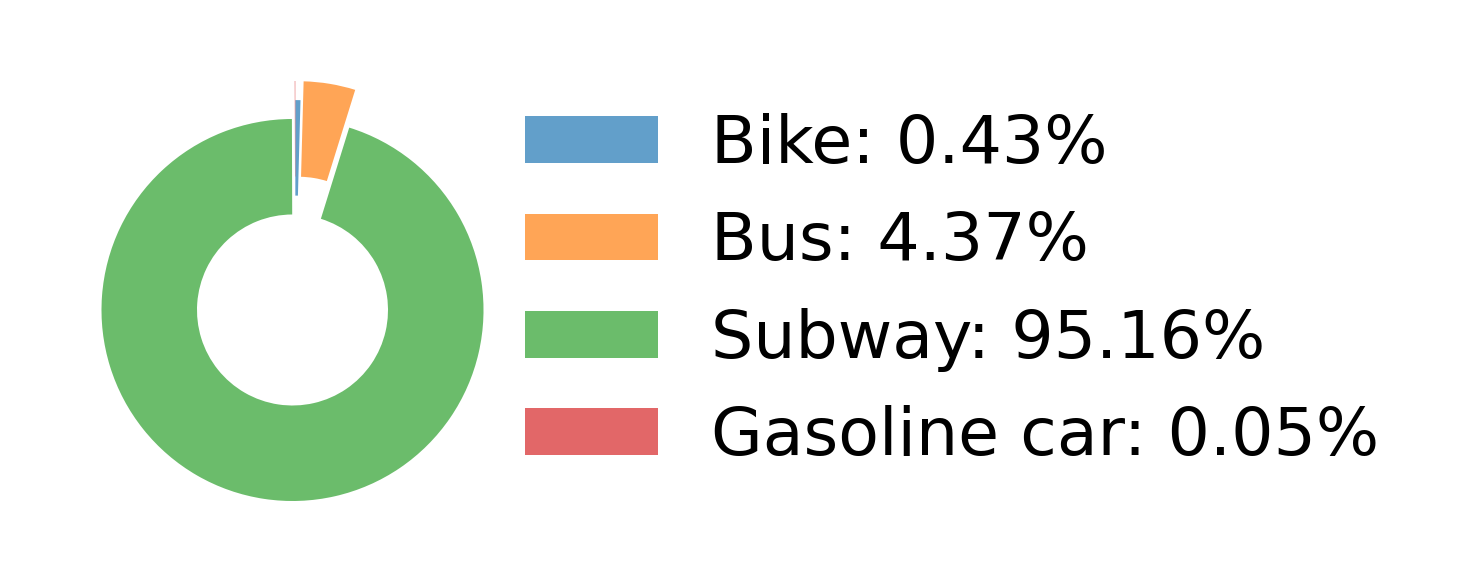

In [13]:

import matplotlib.pyplot as plt

# Data from the image
labels = ['Bike','Bus','Subway','Gasoline car']
mode_shift = np.round(np.array([0.004260,0.043701,0.951572, 0.000467]),4)*100


# Create the figure and axis
fig, ax = plt.subplots(figsize=(1,1),dpi=600)

wedges, texts = ax.pie(mode_shift, explode=explode, startangle=90, counterclock=False, 
                       wedgeprops=dict(width=0.5,alpha=0.7), colors=plt.cm.tab10.colors)

# Create the legend with colored squares, labels, and values
legend_labels = [f'{label}: {value:.2f}%' for label, value in zip(labels, mode_shift)]
legend = ax.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(0.87, 0, 0.5, 1),fontsize=8)

# Remove the border of the legend
legend.get_frame().set_linewidth(0.0)
legend.get_frame().set_alpha(0.0)
# Ensure the chart is circular
ax.axis('equal')

# Set the title

plt.rcParams['svg.fonttype']='none'

plt.show()


In [14]:
dc2[dc2['travel_preference']=='bike'][['after_mode','mode_shift']]

,after_mode,mode_shift
0,bike,0.976804
1,bus,0.015353
2,car,0.000167
3,subway,0.007676


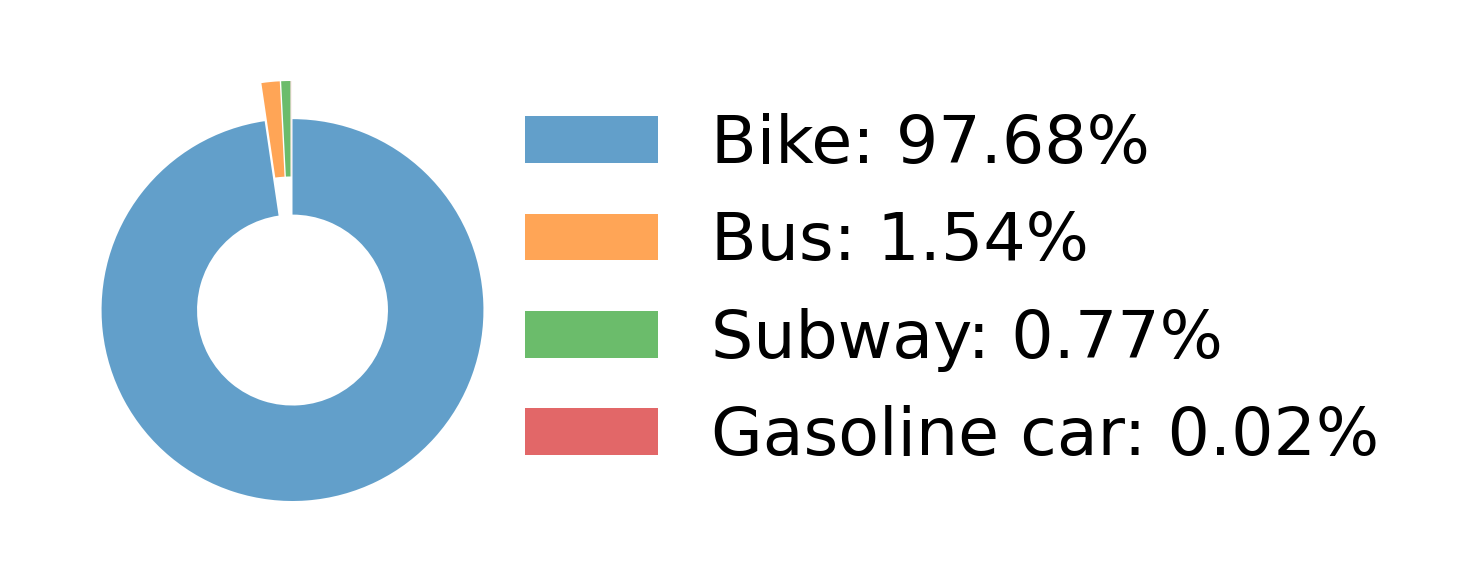

In [15]:

labels = ['Bike','Bus','Subway','Gasoline car']
mode_shift = np.round(np.array([0.9768,0.015353,0.007676, 0.000167]),4)*100

# Highlighting the smaller proportions by exploding them slightly
explode = [0.1, 0.1, 0.1, 0.1]  # Only explode the smaller sections

# Create the figure and axis
fig, ax = plt.subplots(figsize=(1,1),dpi=600)

# Plotting the pie chart
wedges, texts = ax.pie(mode_shift, explode=explode, startangle=90, counterclock=False, 
                       wedgeprops=dict(width=0.5,alpha=0.7), colors=plt.cm.tab10.colors)

# Create the legend with colored squares, labels, and values
legend_labels = [f'{label}: {value:.2f}%' for label, value in zip(labels, mode_shift)]
legend = ax.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(0.87, 0, 0.5, 1),fontsize=8)

# Remove the border of the legend
legend.get_frame().set_linewidth(0.0)
legend.get_frame().set_alpha(0.0)
# Ensure the chart is circular
ax.axis('equal')

# Set the title

plt.rcParams['svg.fonttype']='none'

# Display the chart
plt.show()


In [16]:
dc2[dc2['travel_preference']=='car'][['after_mode','mode_shift']]

,after_mode,mode_shift
8,bike,0.008245
9,bus,0.049652
10,car,0.855039
11,subway,0.087064


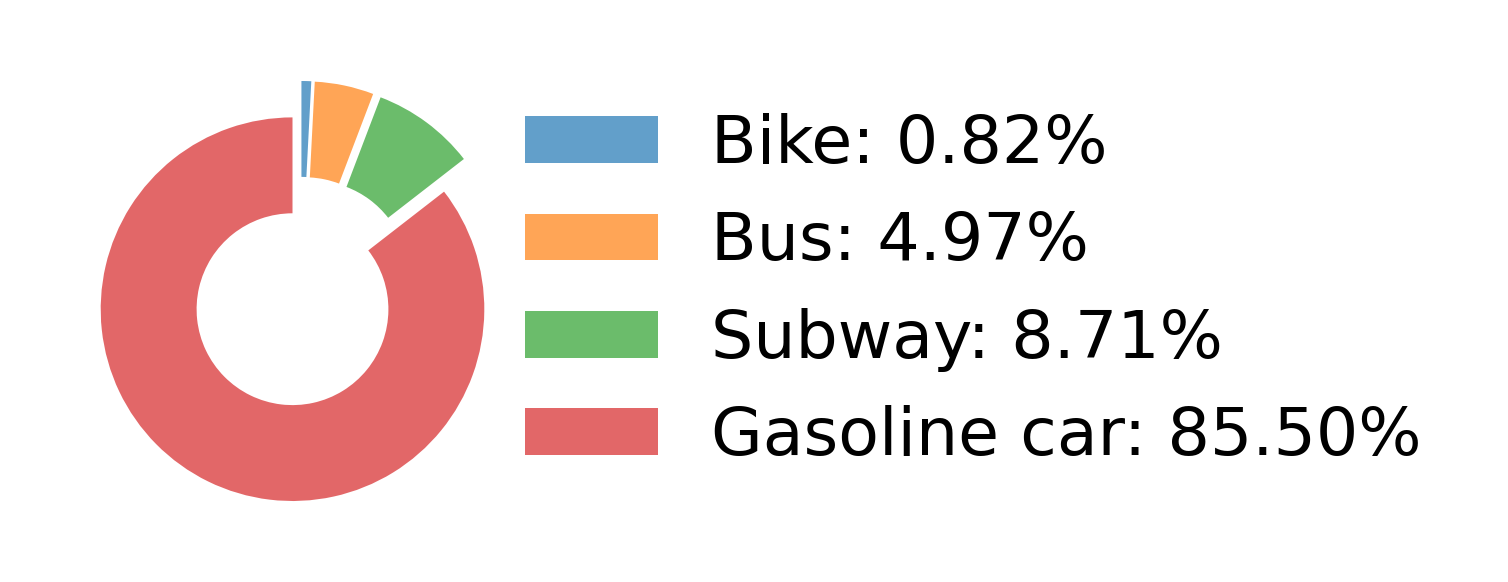

In [17]:

labels = ['Bike','Bus','Subway','Gasoline car']
mode_shift = np.round(np.array([0.008245,0.049652,0.087064, 0.855039]),4)*100

# Highlighting the smaller proportions by exploding them slightly
explode = [0.1, 0.1, 0.1, 0.1]  # Only explode the smaller sections

# Create the figure and axis
fig, ax = plt.subplots(figsize=(1,1),dpi=600)

# Plotting the pie chart
wedges, texts = ax.pie(mode_shift, explode=explode, startangle=90, counterclock=False, 
                       wedgeprops=dict(width=0.5,alpha=0.7), colors=plt.cm.tab10.colors)

# Create the legend with colored squares, labels, and values
legend_labels = [f'{label}: {value:.2f}%' for label, value in zip(labels, mode_shift)]
legend = ax.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(0.87, 0, 0.5, 1),fontsize=8)

# Remove the border of the legend
legend.get_frame().set_linewidth(0.0)
legend.get_frame().set_alpha(0.0)
# Ensure the chart is circular
ax.axis('equal')


plt.rcParams['svg.fonttype']='none'

plt.show()


# 3 Carbon eimssion reductions

In [18]:
from datetime import datetime

In [19]:
csu=pd.read_csv(r'data\carbon_emission_reductions_subway.csv')[['ds','after_mode','amount_final']]
csu.head(2)

,ds,after_mode,amount_final
0,2022/12/1,subway,0.127063
1,2022/12/2,subway,0.262769


In [20]:
cbu=pd.read_csv(r'data\carbon_emission_reductions_bus.csv')[['ds','after_mode','amount_final']]
cbu.head(2)

,ds,after_mode,amount_final
0,2022-12-01,bus,0.496510
1,2022-12-02,bus,0.335958


In [21]:
cbk=pd.read_csv(r'data\carbon_emission_reductions_bike.csv')[['ds','after_mode','amount_final']]
cbk.head(2)

,ds,after_mode,amount_final
0,2022/12/1,bike,0.014306
1,2022/12/2,bike,0.008737


In [22]:

cbu['ds']=pd.to_datetime(cbu['ds'], format='%Y-%m-%d')

In [23]:
cbu['ds']=cbu['ds'].astype(str)
cbu.head(2)

,ds,after_mode,amount_final
0,2022-12-01,bus,0.496510
1,2022-12-02,bus,0.335958


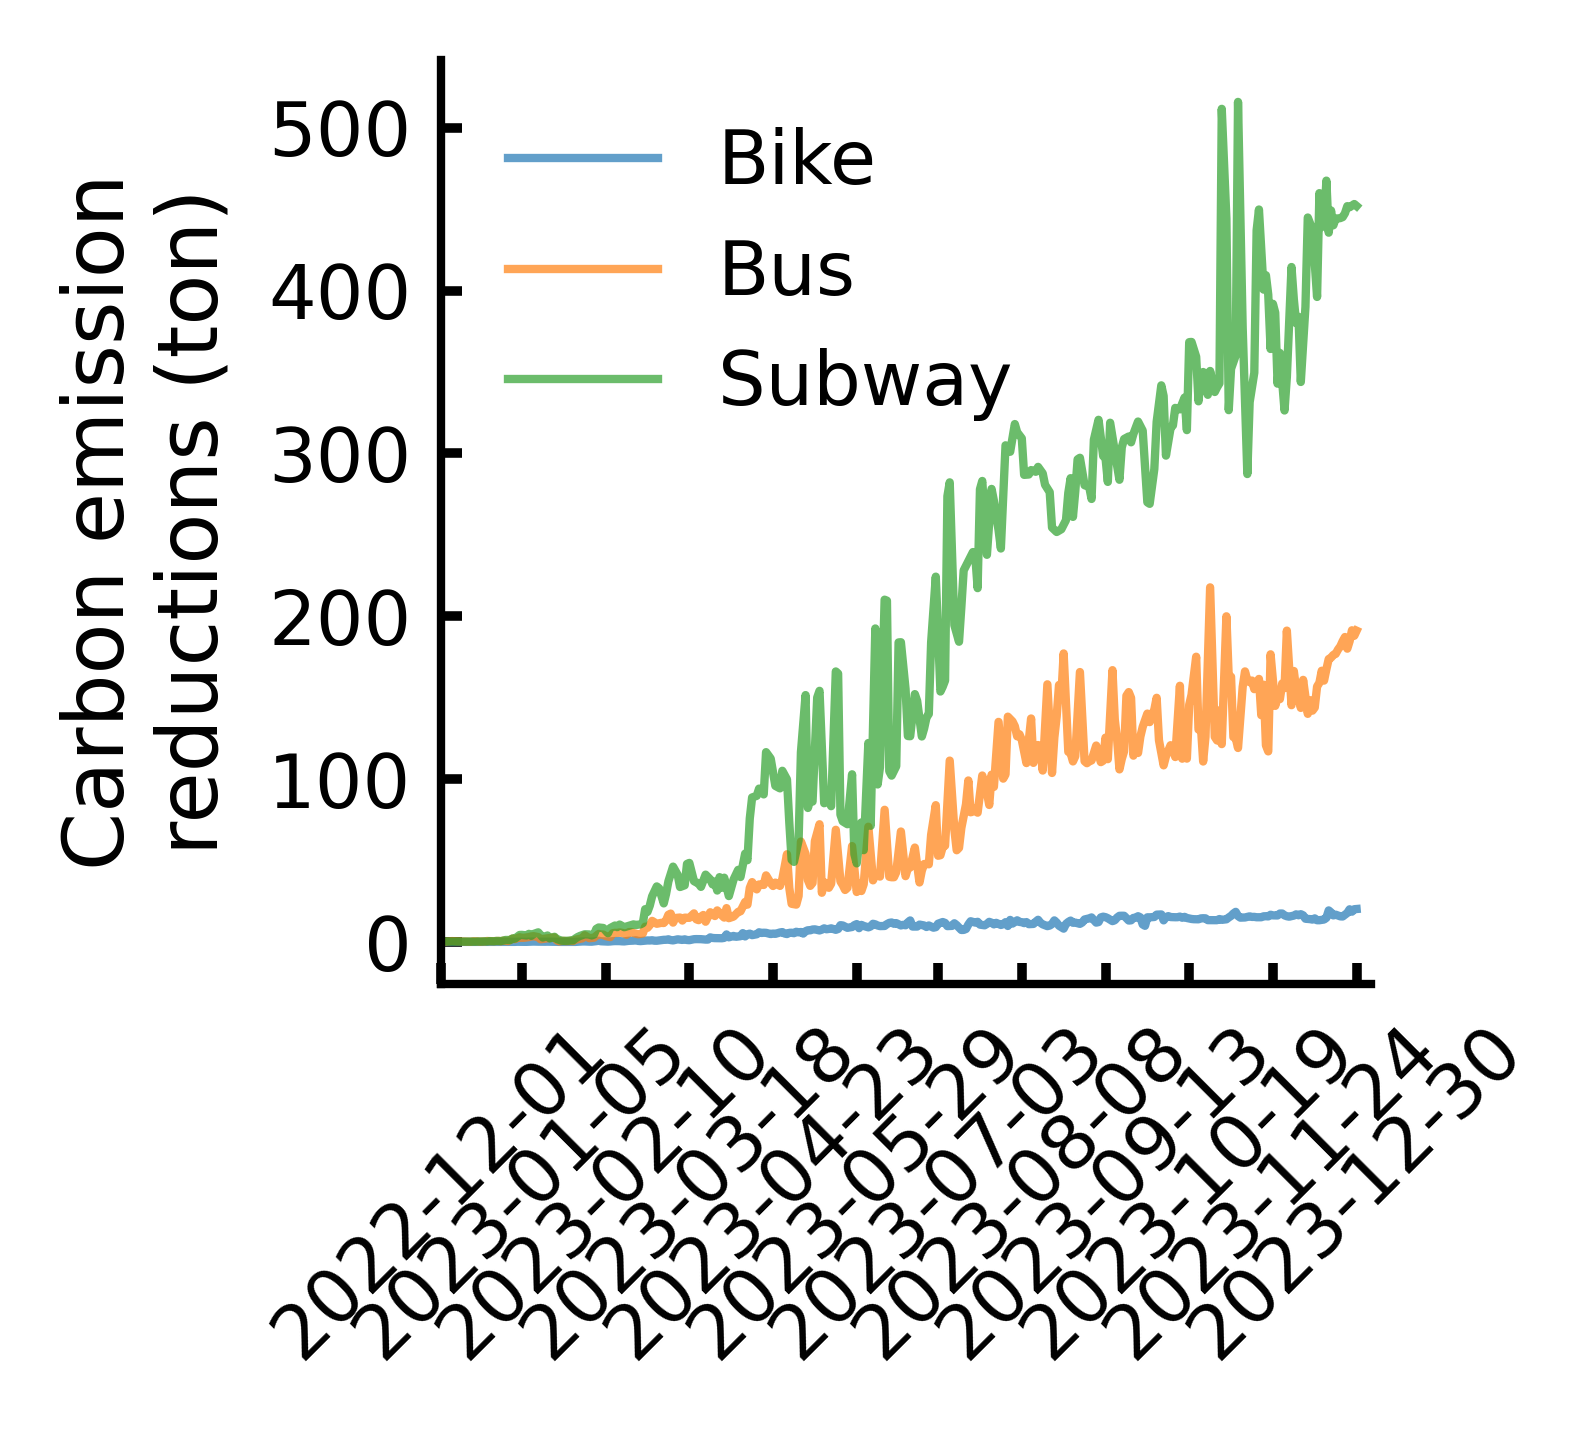

In [24]:
fig, ax = plt.subplots(figsize=(2,2),dpi=600)

plt.rcdefaults()

plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.15
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'




ax.plot(np.arange(0,395),cbk['amount_final'],lw=1,color=plt.cm.tab10(0),alpha=0.7,label='Bike')
ax.plot(np.arange(0,395),cbu['amount_final'],lw=1,color=plt.cm.tab10(1),alpha=0.7,label='Bus')
ax.plot(np.arange(0,395),csu['amount_final'],lw=1,color=plt.cm.tab10(2),alpha=0.7,label='Subway')


ax.legend( fontsize=9,frameon=False)
ax.set_ylabel('Carbon emission\nreductions (ton)',fontsize=10)

ax.set_xlim(0,400)

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
plt.xticks(rotation=45)

rr=pd.date_range(start="2022/12/01", end="2023/12/30", periods=12).strftime("%Y-%m-%d")
xx=[list(cbu['ds']).index(rr[c]) for c in range(rr.shape[0])]
plt.xticks(xx,rr)

ax.tick_params(axis='both',        
            which='major',       
            length=2.5,            
            width=1.15,           
            color='black',          
            labelsize=9,         #
            direction='in')    
plt.rcParams['svg.fonttype']='none'

plt.rcParams['svg.fonttype']='none'




In [25]:
np.average(np.array(cbu['amount_final'])),np.average(np.array(cbk['amount_final'])),np.average(np.array(csu['amount_final']))

(72.26025594858989, 8.273400404989873, 177.93452212670633)

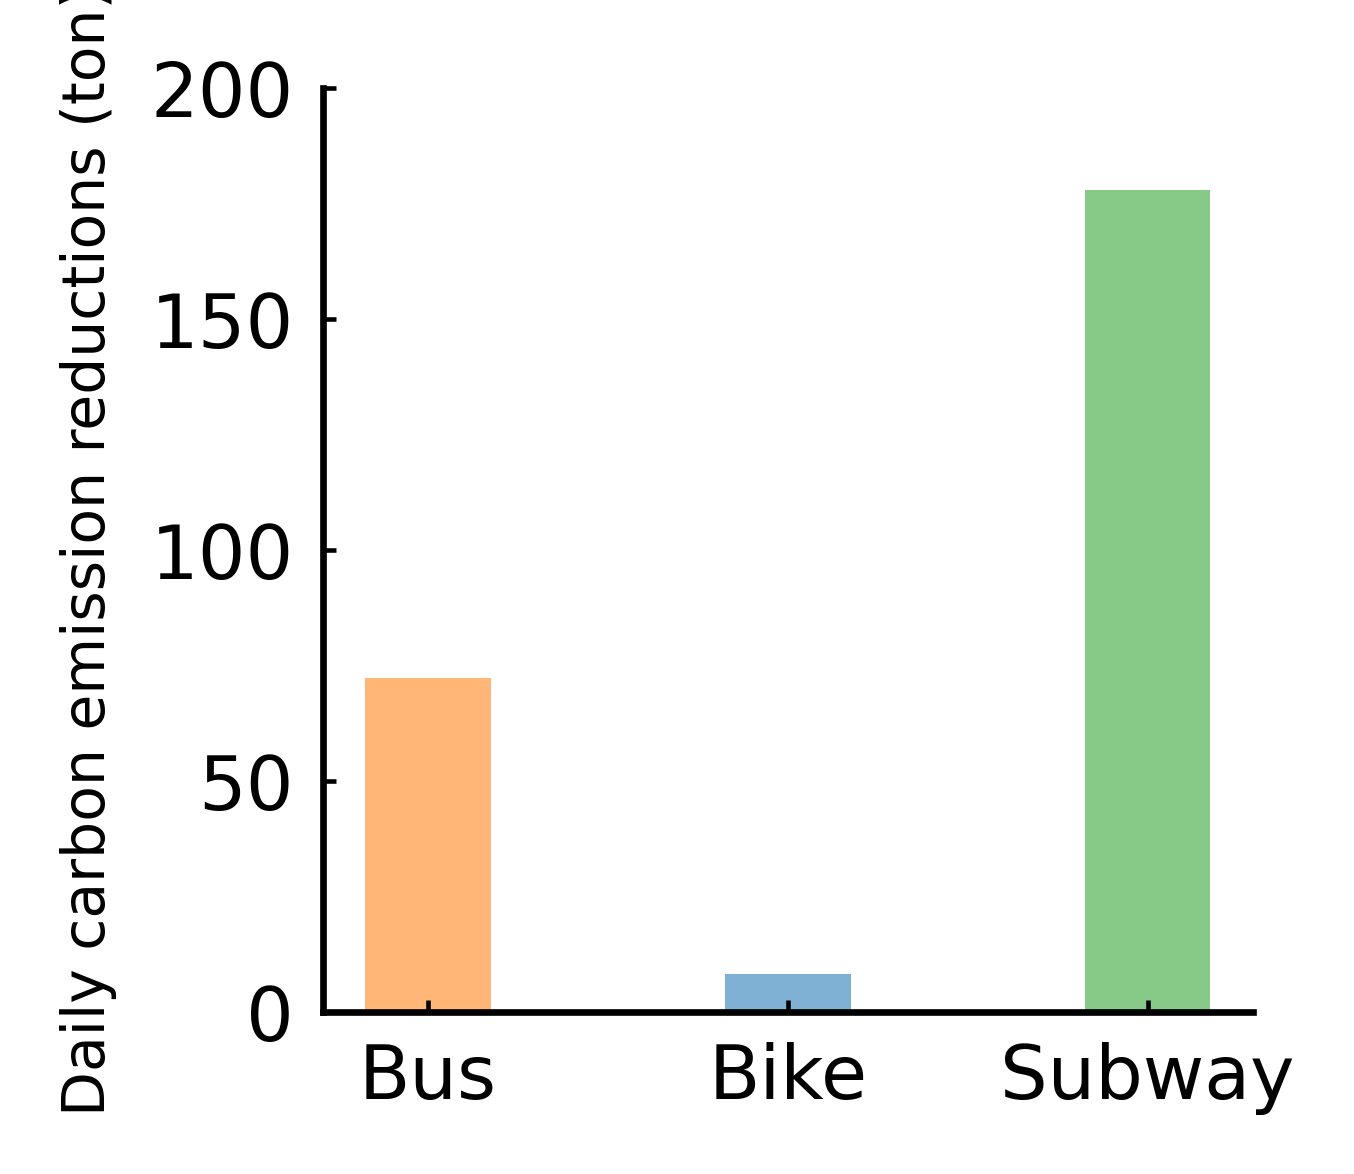

In [26]:

plt.rcdefaults()

fig, ax = plt.subplots(figsize=(2,2),dpi=600)


plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 0.15
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

bars=ax.bar([1,2,3],[72.26025594858989, 8.273400404989873, 177.93452212670633],width=0.35,color=[plt.cm.tab10(1),plt.cm.tab10(0),plt.cm.tab10(2)],alpha=0.57)


ax.set_ylabel('Daily carbon emission reductions (ton)',fontsize=7)

ax.set_xticks([1,2,3])  
ax.set_xticklabels(['Bus','Bike','Subway'],fontsize=7)

ax.set_ylim(0,200)


ax.tick_params(axis='both',     
            which='major',        
            length=1.5,           
            width=0.55,             
            color='black',       
            labelsize=9,     
            direction='in')   
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
plt.rcParams['svg.fonttype']='none'



# 3 difference of the intervention on carbon emission reductions and mode shifts

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats

In [28]:
avt=pd.read_csv(r'data\P2_trip_time_carbon_emission.csv')
tnp=pd.read_csv(r'data\P2_trip_number_carbon_emission.csv')
inc=pd.read_csv(r'data\P2_income_carbon_emission.csv')
ag=pd.read_csv(r'data\P2_age_carbon_emission.csv')
gd=pd.read_csv(r'data\P2_gender_carbon_emission.csv')



In [29]:
gd['bianji']=(np.array(gd['green_travel_ratio'])*np.array(gd['trip_all'])+1)/np.array(gd['trip_all'])
ag['bianji']=(np.array(ag['green_travel_ratio'])*np.array(ag['trip_all'])+1)/np.array(ag['trip_all'])
inc['bianji']=(np.array(inc['green_travel_ratio'])*np.array(inc['trip_all'])+1)/np.array(inc['trip_all'])
tnp['bianji']=(np.array(tnp['green_travel_ratio'])*np.array(tnp['trip_all'])+1)/np.array(tnp['trip_all'])
avt['bianji']=(np.array(avt['green_travel_ratio'])*np.array(avt['trip_all'])+1)/np.array(avt['trip_all'])
#
gd['bianji_cz']=(np.array(gd['green_travel_ratio'])*np.array(gd['trip_all'])+1)/np.array(gd['trip_all'])-np.array(gd['green_travel_ratio'])
ag['bianji_cz']=(np.array(ag['green_travel_ratio'])*np.array(ag['trip_all'])+1)/np.array(ag['trip_all'])-np.array(ag['green_travel_ratio'])
inc['bianji_cz']=(np.array(inc['green_travel_ratio'])*np.array(inc['trip_all'])+1)/np.array(inc['trip_all'])-np.array(inc['green_travel_ratio'])
tnp['bianji_cz']=(np.array(tnp['green_travel_ratio'])*np.array(tnp['trip_all'])+1)/np.array(tnp['trip_all'])-np.array(tnp['green_travel_ratio'])
avt['bianji_cz']=(np.array(avt['green_travel_ratio'])*np.array(avt['trip_all'])+1)/np.array(avt['trip_all'])-np.array(avt['green_travel_ratio'])

In [30]:
tnp['ind']=[0,6,4,5,1,2,3]
tnp=tnp.sort_values(by='ind')
tnp

,trip_lable,green_travel_ratio,danci_carbon_kg,trip_all,bianji,bianji_cz,ind
0,<30,0.560749,3.292467,13.812229,0.633148,0.072400,0
4,"[30,60)",0.657435,3.198697,43.096571,0.680639,0.023204,1
5,"[60,90)",0.695160,3.159870,73.345872,0.708794,0.013634,2
6,"[90,120)",0.729175,3.142136,103.571677,0.738830,0.009655,3
2,"[120,150)",0.757030,3.148914,133.737120,0.764507,0.007477,4
3,"[150,180)",0.778165,3.109277,163.924547,0.784265,0.006100,5
1,>=180,0.844856,3.158281,351.925301,0.847698,0.002842,6


In [31]:
avt['ind']=[0,4,1,2,3]
avt=avt.sort_values(by='ind')
avt

,time_lable,green_travel_ratio,danci_carbon_kg,trip_all,bianji,bianji_cz,ind
0,<15,0.714307,2.898228,53.245669,0.733088,0.018781,0
2,"[15,30)",0.676845,2.636990,51.860825,0.696127,0.019282,1
3,"[30,45)",0.609358,3.206031,53.142854,0.628176,0.018817,2
4,"[45,60)",0.579933,3.962963,49.415347,0.600170,0.020237,3
1,>=60,0.600038,4.074212,42.284620,0.623687,0.023649,4


#### carbon emission reductions

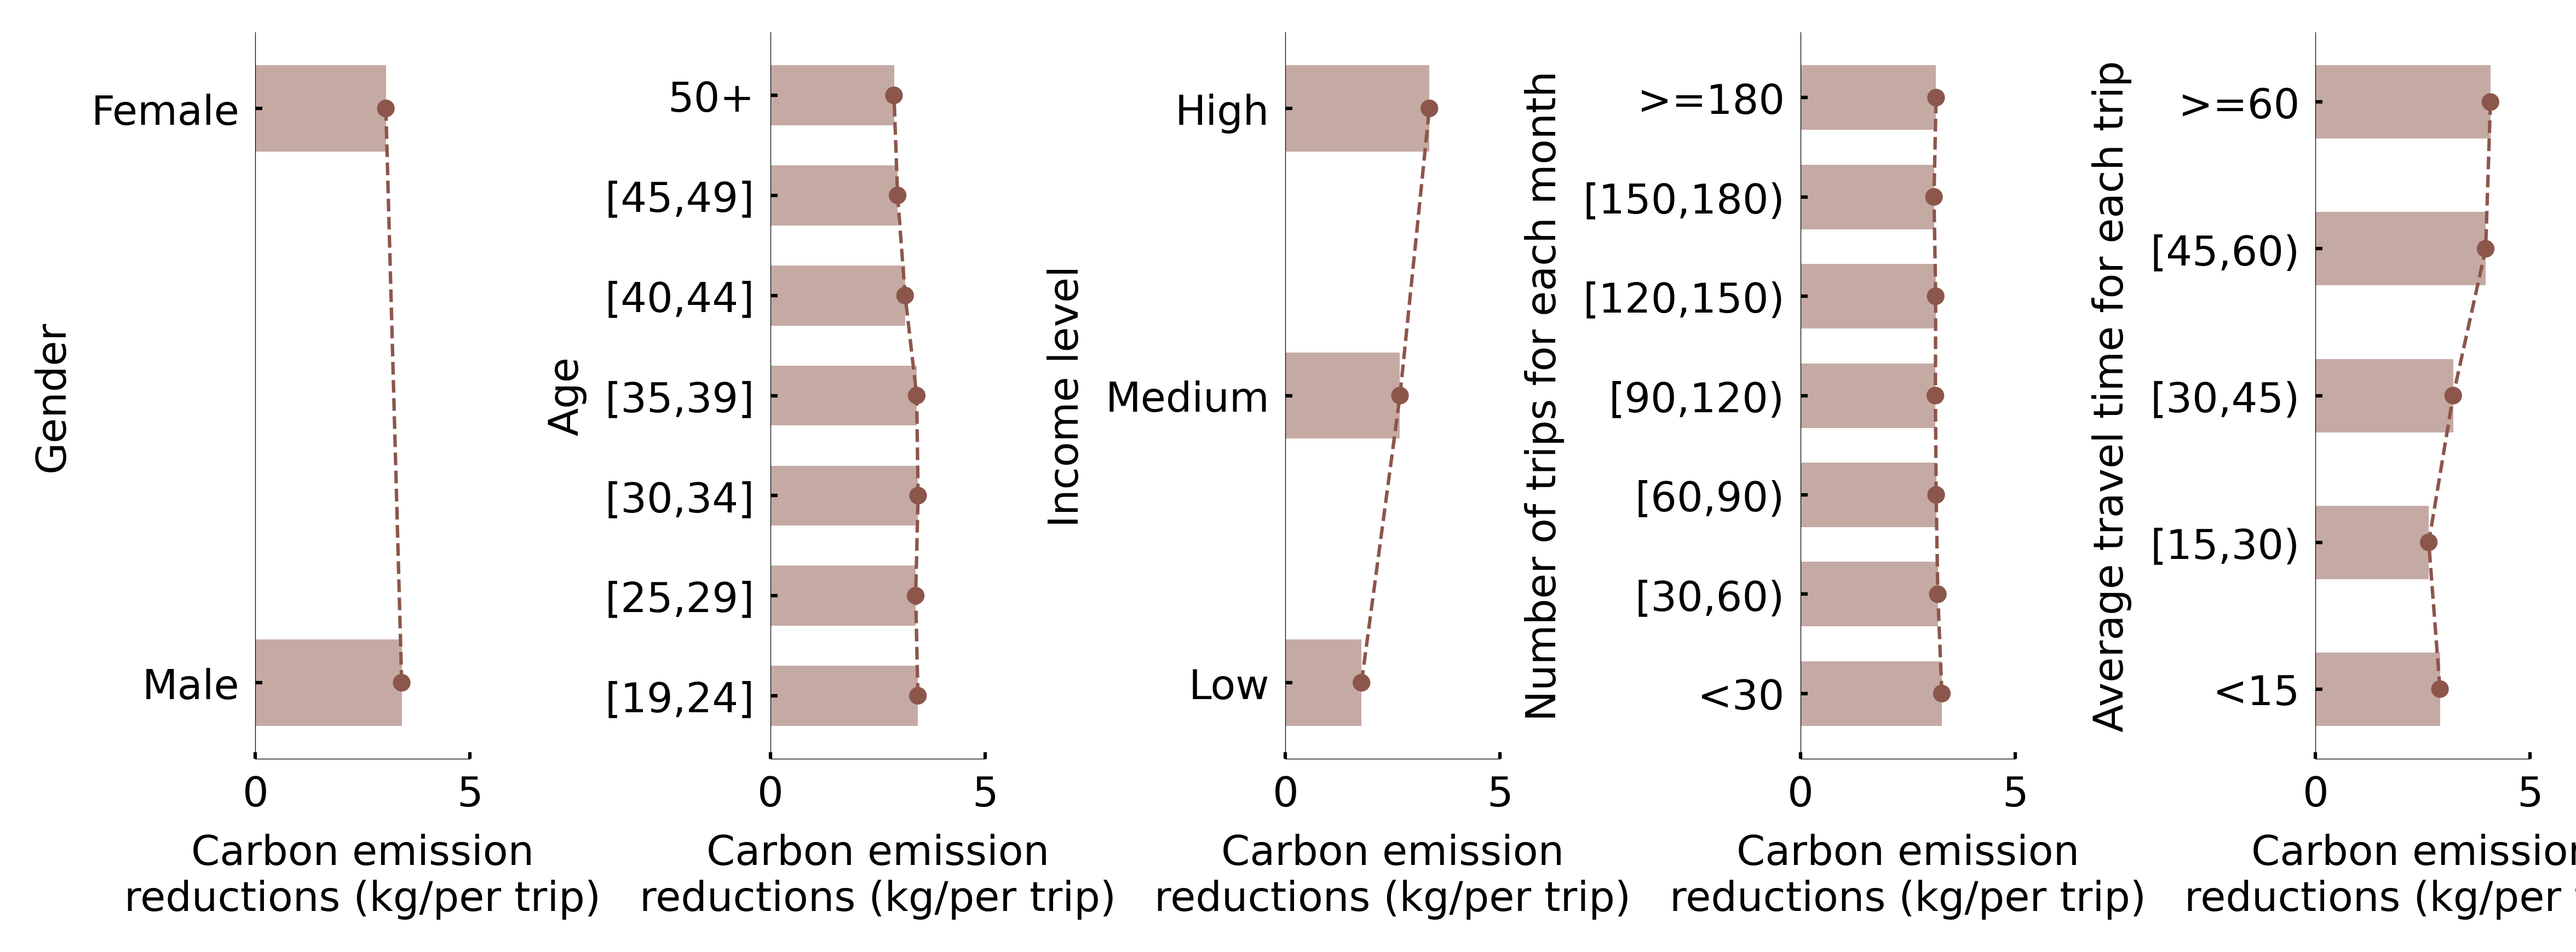

In [32]:
fig,ax=plt.subplots(1,5,figsize=(8,3),dpi=600)
# ax1
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1
ax[0].barh(gd['gender'],gd['danci_carbon_kg'],height=0.15,color=plt.cm.tab10(5),alpha=0.5)
ax[0].plot(gd['danci_carbon_kg'], gd['gender'], '--',linewidth=0.75,alpha=1,color=plt.cm.tab10(5))
ax[0].scatter(gd['danci_carbon_kg'], gd['gender'], alpha=1, color=plt.cm.tab10(5), marker='.',s=60,edgecolors='none')


ax[0].tick_params(axis='both',       
            which='major',       
            length=1.5,        
            width=0.75,            
            color='black',         
            labelsize=9,       
            direction='in')  
ax[0].set_xlim(0,5)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False) 
ax[0].set_ylabel('Gender', fontsize=9) 
ax[0].set_xlabel('Carbon emission\nreductions (kg/per trip)', fontsize=9) 


# ax2
ax[1].barh(ag['age'],ag['danci_carbon_kg'],height=0.6,color=plt.cm.tab10(5),alpha=0.5)
ax[1].plot(ag['danci_carbon_kg'], ag['age'], '--',linewidth=0.75,alpha=1,color=plt.cm.tab10(5))
ax[1].scatter(ag['danci_carbon_kg'], ag['age'], alpha=1, color=plt.cm.tab10(5), marker='.',s=60,edgecolors='none')


ax[1].tick_params(axis='both',         
            which='major',      
            length=1.5,          
            width=0.75,          
            color='black',        
            labelsize=9,     
            direction='in')   
ax[1].set_xlim(0,5)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False) 
ax[1].set_ylabel('Age', fontsize=9) 
ax[1].set_xlabel('Carbon emission\nreductions (kg/per trip)', fontsize=9) 

# ax3
ax[2].barh(inc['income'],inc['danci_carbon_kg'],height=0.3,color=plt.cm.tab10(5),alpha=0.5)
ax[2].plot(inc['danci_carbon_kg'], inc['income'], '--',linewidth=0.75,alpha=1,color=plt.cm.tab10(5))
ax[2].scatter(inc['danci_carbon_kg'], inc['income'], alpha=1, color=plt.cm.tab10(5), marker='.',s=60,edgecolors='none')
ax[2].tick_params(axis='both',       
            which='major',      
            length=1.5,         
            width=0.75,            
            color='black',      
            labelsize=9,       
            direction='in')  
ax[2].set_xlim(0,5)
ax[2].spines['top'].set_visible(False) 
ax[2].spines['right'].set_visible(False) 
ax[2].set_ylabel('Income level', fontsize=9) 
ax[2].set_xlabel('Carbon emission\nreductions (kg/per trip)', fontsize=9) 
# ax4
ax[3].barh(tnp['trip_lable'],tnp['danci_carbon_kg'],height=0.65,color=plt.cm.tab10(5),alpha=0.5)

ax[3].plot(tnp['danci_carbon_kg'], tnp['trip_lable'], '--',linewidth=0.75,alpha=1,color=plt.cm.tab10(5))
ax[3].scatter(tnp['danci_carbon_kg'], tnp['trip_lable'], alpha=1, color=plt.cm.tab10(5), marker='.',s=60,edgecolors='none')

ax[3].tick_params(axis='both',         
            which='major',     
            length=1.5,          
            width=0.75,            
            color='black',        
            labelsize=9,       
            direction='in') 
ax[3].set_xlim(0,5)
ax[3].spines['top'].set_visible(False) 
ax[3].spines['right'].set_visible(False) 
ax[3].set_ylabel('Number of trips for each month', fontsize=9) 
ax[3].set_xlabel('Carbon emission\nreductions (kg/per trip)', fontsize=9) 
# ax5

ax[4].barh(avt['time_lable'],avt['danci_carbon_kg'],height=0.5,color=plt.cm.tab10(5),alpha=0.5)

ax[4].plot(avt['danci_carbon_kg'], avt['time_lable'], '--',linewidth=0.75,alpha=1,color=plt.cm.tab10(5))
ax[4].scatter(avt['danci_carbon_kg'], avt['time_lable'], alpha=1, color=plt.cm.tab10(5), marker='.',s=60,edgecolors='none')

ax[4].tick_params(axis='both',    
            which='major',     
            length=1.5,       
            width=0.75,             
            color='black',       
            labelsize=9,       
            direction='in')    
ax[4].set_xlim(0,5)

ax[4].spines['top'].set_visible(False) 
ax[4].spines['right'].set_visible(False) 
ax[4].set_ylabel('Average travel time for each trip', fontsize=9) 
ax[4].set_xlabel('Carbon emission\nreductions (kg/per trip)', fontsize=9) 
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1
plt.tight_layout()
plt.subplots_adjust(wspace=1.4)
#
plt.rcParams['svg.fonttype']='none'

##### changes in green travel ratios

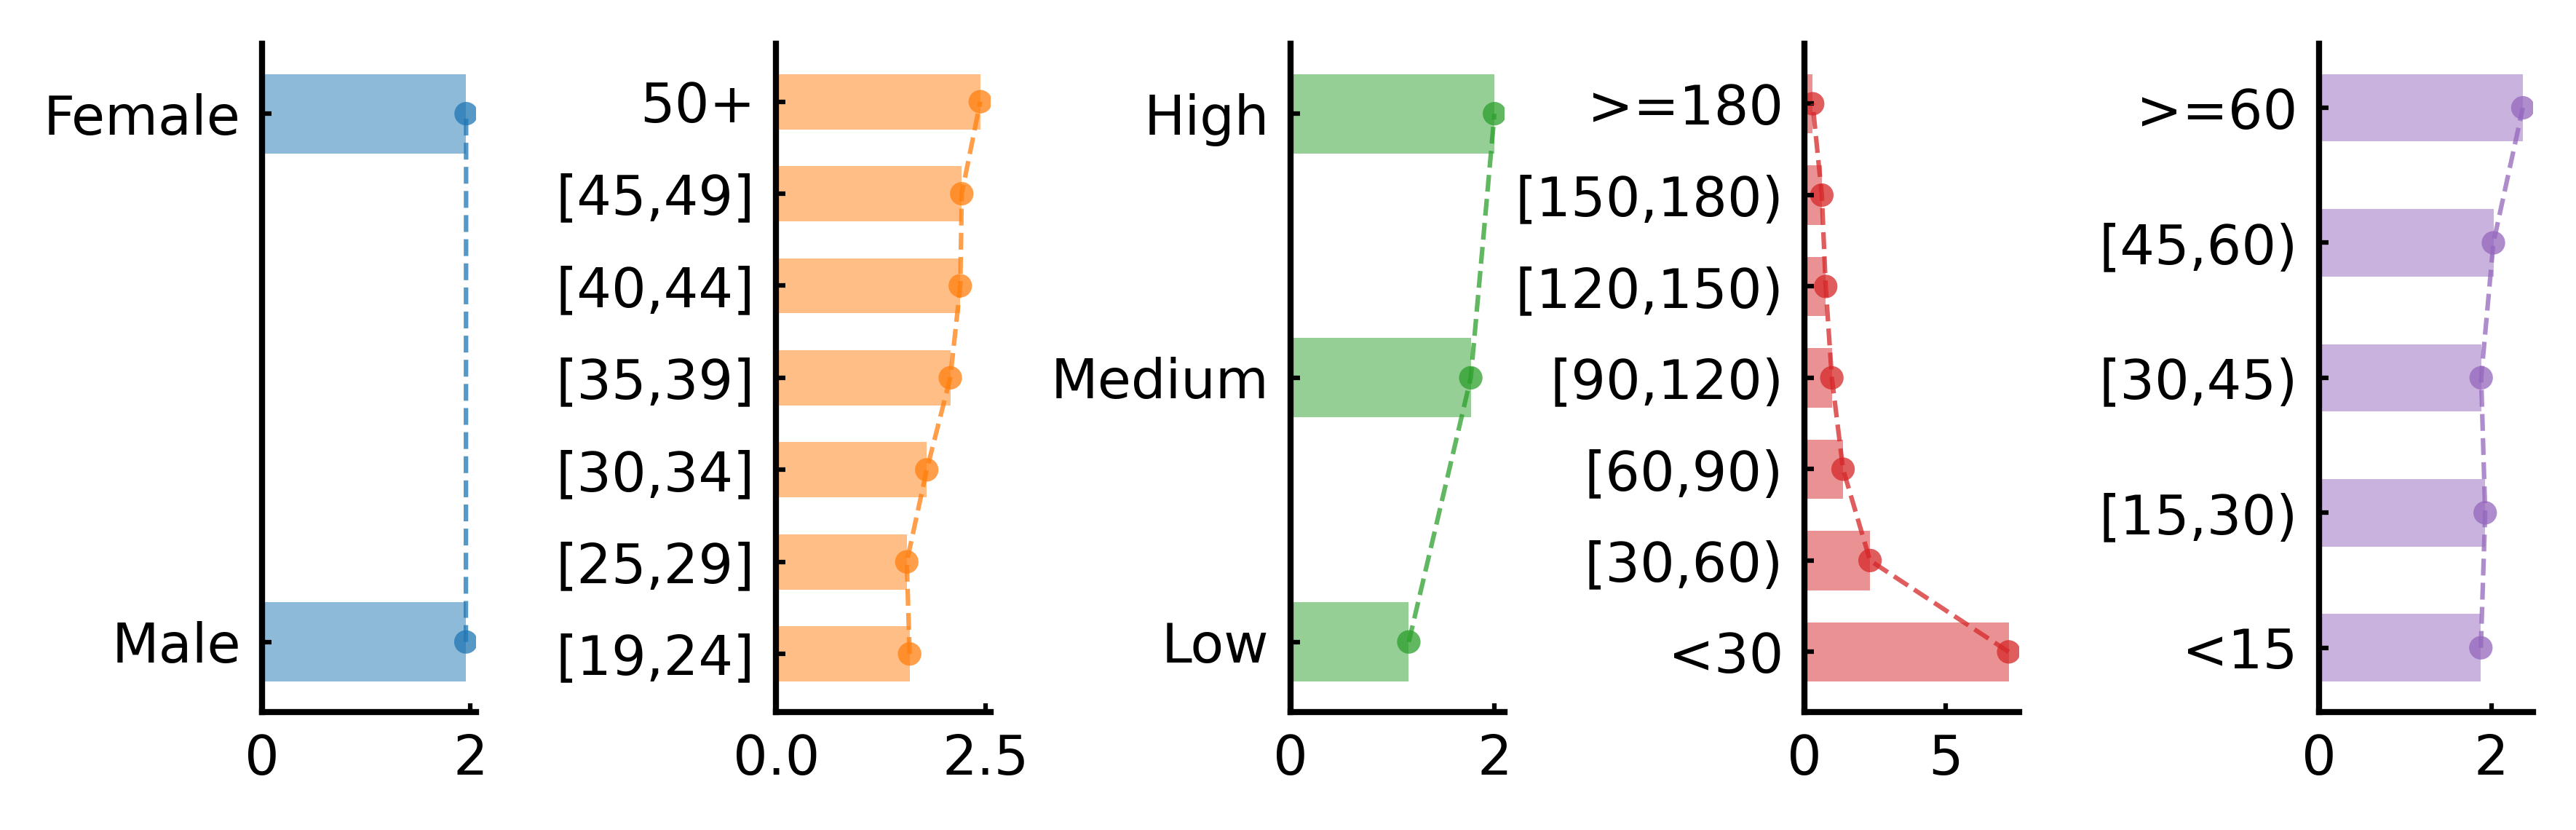

In [33]:
fig,ax=plt.subplots(1,5,figsize=(6,2),dpi=600)
# ax1
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1
ax[0].barh(gd['gender'],gd['bianji_cz']*100,height=0.15,color=plt.cm.tab10(0),alpha=0.5)
ax[0].plot(gd['bianji_cz']*100, gd['gender'], '--',linewidth=0.75,alpha=0.75,color=plt.cm.tab10(0))
ax[0].scatter(gd['bianji_cz']*100, gd['gender'], alpha=0.75, color=plt.cm.tab10(0), marker='.',s=60,edgecolors='none')


ax[0].tick_params(axis='both',       
            which='major',       
            length=1.5,          
            width=0.75,            
            color='black',        
            labelsize=9,       
            direction='in')   
ax[0].spines['top'].set_visible(False) 
ax[0].spines['right'].set_visible(False)

# ax2
ax[1].barh(ag['age'],ag['bianji_cz']*100,height=0.6,color=plt.cm.tab10(1),alpha=0.5)
ax[1].plot(ag['bianji_cz']*100, ag['age'], '--',linewidth=0.75,alpha=0.75,color=plt.cm.tab10(1))
ax[1].scatter(ag['bianji_cz']*100, ag['age'], alpha=0.75, color=plt.cm.tab10(1), marker='.',s=60,edgecolors='none')


ax[1].tick_params(axis='both',         
            which='major',       
            length=1.5,            
            width=0.75,          
            color='black',       
            labelsize=9,         
            direction='in')   
ax[1].spines['top'].set_visible(False) 
ax[1].spines['right'].set_visible(False) 
# ax3
ax[2].barh(inc['income'],inc['bianji_cz']*100,height=0.3,color=plt.cm.tab10(2),alpha=0.5)
ax[2].plot(inc['bianji_cz']*100, inc['income'], '--',linewidth=0.75,alpha=0.75,color=plt.cm.tab10(2))
ax[2].scatter(inc['bianji_cz']*100, inc['income'], alpha=0.75, color=plt.cm.tab10(2), marker='.',s=60,edgecolors='none')
ax[2].tick_params(axis='both',        
            which='major',       
            length=1.5,            
            width=0.75,             
            color='black',        
            labelsize=9,        
            direction='in')   
ax[2].spines['top'].set_visible(False) 
ax[2].spines['right'].set_visible(False) 
# ax4
ax[3].barh(tnp['trip_lable'],tnp['bianji_cz']*100,height=0.65,color=plt.cm.tab10(3),alpha=0.5)

ax[3].plot(tnp['bianji_cz']*100, tnp['trip_lable'], '--',linewidth=0.75,alpha=0.75,color=plt.cm.tab10(3))
ax[3].scatter(tnp['bianji_cz']*100, tnp['trip_lable'], alpha=0.75, color=plt.cm.tab10(3), marker='.',s=60,edgecolors='none')

ax[3].tick_params(axis='both',       
            which='major',       
            length=1.5,              
            width=0.75,              
            color='black',         
            labelsize=9,         
            direction='in')     
ax[3].spines['top'].set_visible(False)  
ax[3].spines['right'].set_visible(False)  
# ax5

ax[4].barh(avt['time_lable'],avt['bianji_cz']*100,height=0.5,color=plt.cm.tab10(4),alpha=0.5)

ax[4].plot(avt['bianji_cz']*100, avt['time_lable'], '--',linewidth=0.75,alpha=0.75,color=plt.cm.tab10(4))
ax[4].scatter(avt['bianji_cz']*100, avt['time_lable'], alpha=0.75, color=plt.cm.tab10(4), marker='.',s=60,edgecolors='none')

ax[4].tick_params(axis='both',          
            which='major',        
            length=1.5,             
            width=0.75,             
            color='black',          
            labelsize=9,         
            direction='in')     
ax[4].spines['top'].set_visible(False)  
ax[4].spines['right'].set_visible(False)  
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1
plt.tight_layout()
plt.subplots_adjust(wspace=1.4)
#
plt.rcParams['svg.fonttype']='none'
